In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Basic analysis 
-------------------------------------------------

In [2]:
city_day_1 = pd.read_csv(r"D:\Air Quality\Air Quality\city_day.csv")#, parse_dates = ['Date'], index_col='Date'

In [3]:
city_day_1.shape

(29531, 16)

In [4]:
city_day = city_day_1

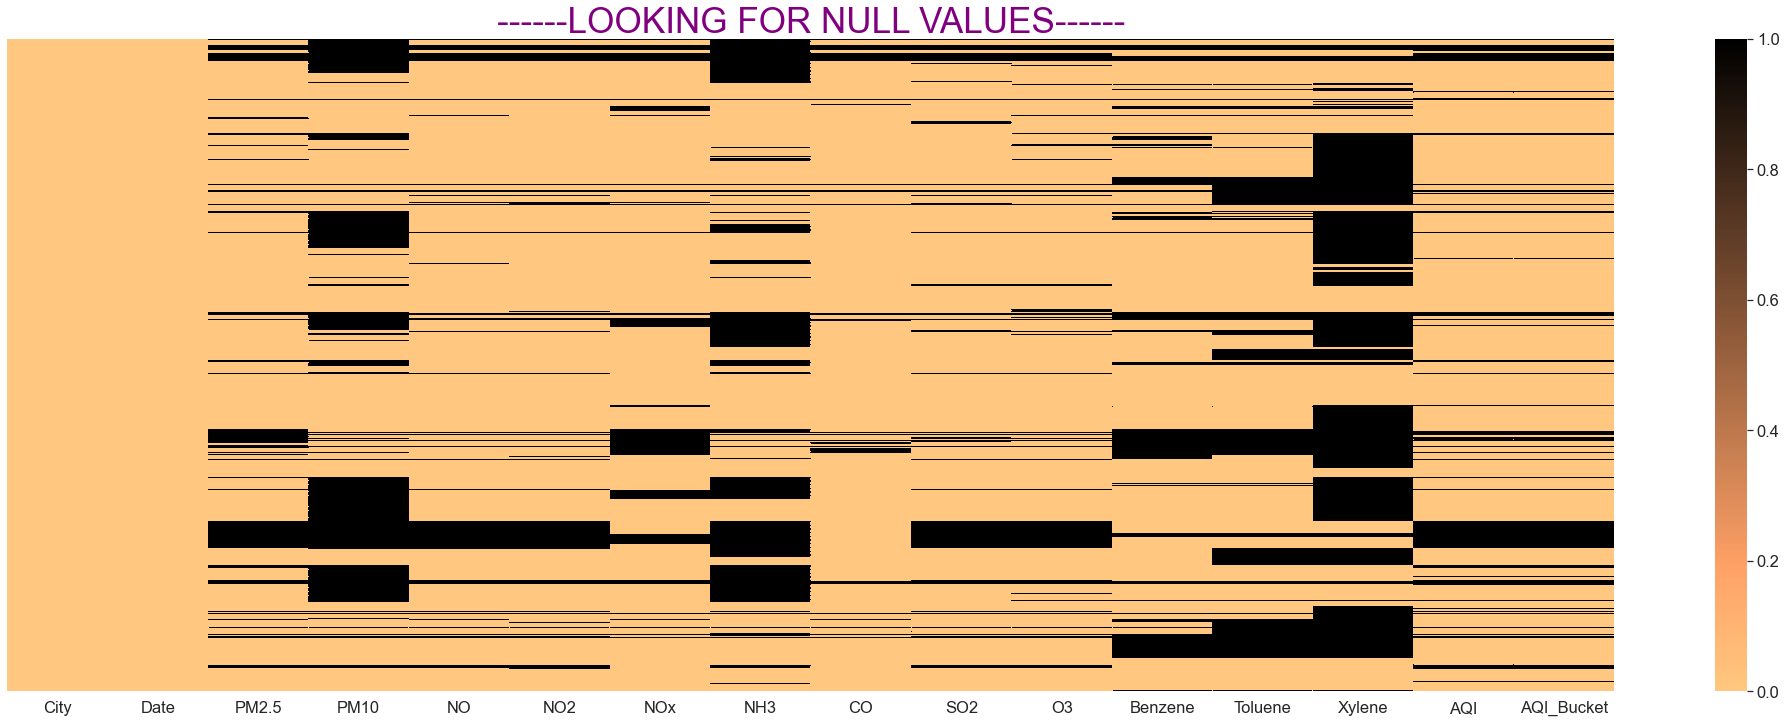

In [5]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(city_day.isnull(),cmap = 'copper_r',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

*PM2.5,	PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene are the pollutants present in the air(pollution).
### Black colour in the heatmap represents the null values 
##### Xylene is having 61.32% null values so this column should be dropped off.
##### Remaining null values will be calculated in statistical manner.

In [6]:
(city_day.isnull().sum()/len(city_day)*100).sort_values

NumExpr defaulting to 8 threads.


<bound method Series.sort_values of City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64>

In [7]:
city_day.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

*We need to replace index column with the date column for further analysis(predictions) and calculation.

In [8]:
city_day['Date'] = city_day['Date'].apply(pd.to_datetime)
city_day.set_index('Date', inplace = True)

In [9]:
city_day.head(3)

City  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
Date                                                                         
2015-01-01  Ahmedabad    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
2015-01-02  Ahmedabad    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2015-01-03  Ahmedabad    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   

                O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
Date                                                          
2015-01-01  133.36     0.00     0.02    0.00  NaN        NaN  
2015-01-02   34.06     3.68     5.50    3.77  NaN        NaN  
2015-01-03   30.70     6.80    16.40    2.25  NaN        NaN

## **Exploratory data analysis
---------------------------------------------------------
### NULL values imputation
Filling remaining null values with mean using lambda function.

In [10]:
city_day.iloc[:,1:13] = city_day.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [11]:
# city_day.head(3)

In [12]:
(city_day.isnull().sum()/len(city_day)*100).sort_values

<bound method Series.sort_values of City           0.000000
PM2.5          0.000000
PM10           6.803021
NO             0.000000
NO2            0.000000
NOx            3.958552
NH3            6.803021
CO             0.000000
SO2            0.000000
O3             0.548576
Benzene        9.251295
Toluene       13.578951
Xylene        44.180691
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64>

In [13]:
# city_day.head(3)

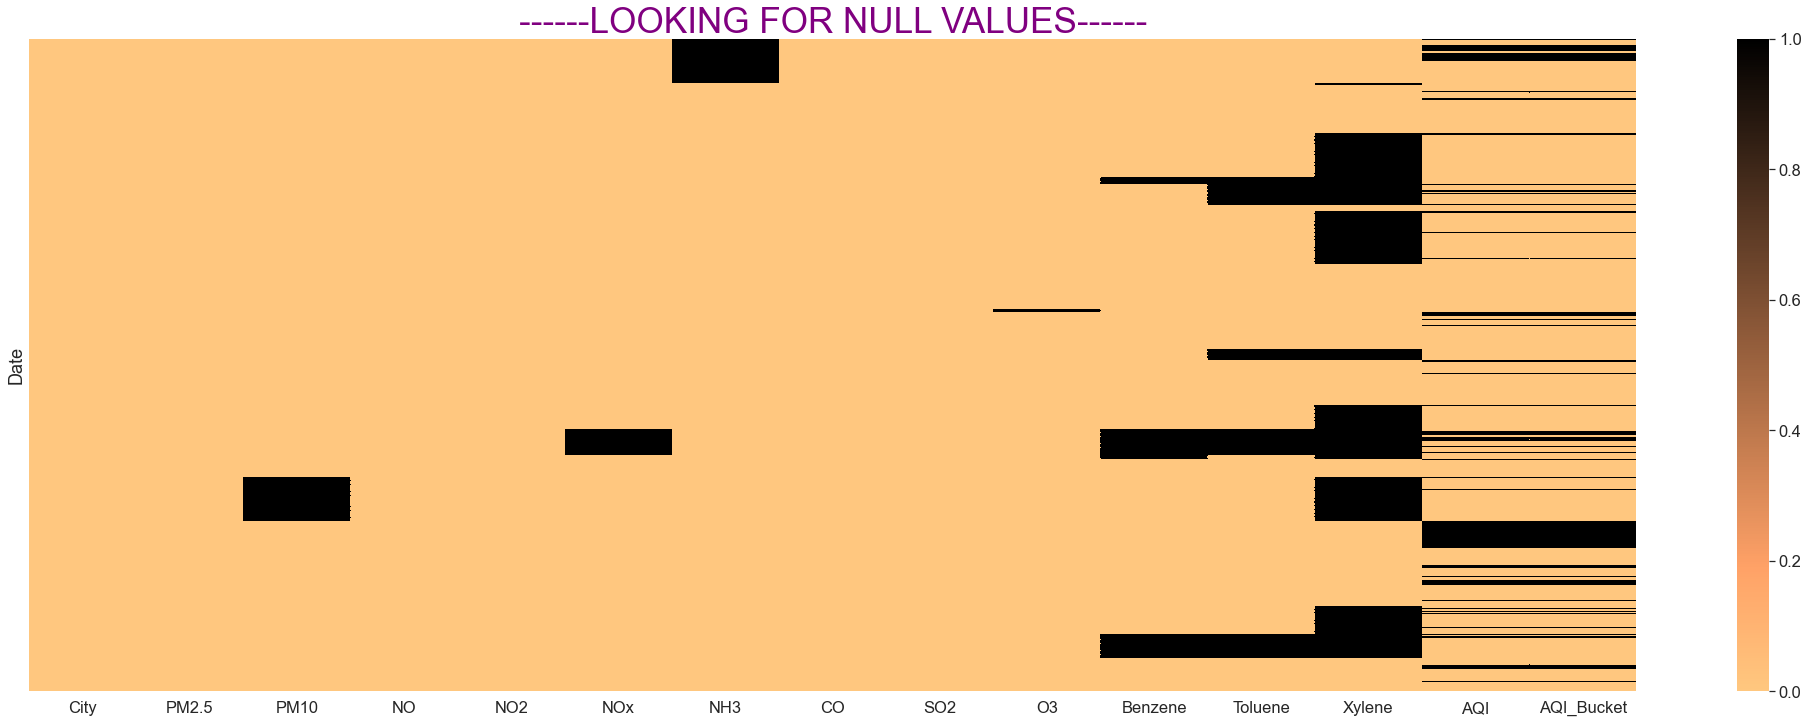

In [14]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(city_day.isnull(),cmap = 'copper_r',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

#### *Still there are many null values in dataset. So these should be handled manually.

### Again Filling null values with the mean of every single column.

In [15]:
PM10_mean=city_day['PM10'].mean()
city_day['PM10'].fillna(value=PM10_mean, inplace=True)

NOx_mean=city_day['NOx'].mean()
city_day['NOx'].fillna(value=NOx_mean, inplace=True)

NH3_mean=city_day['NH3'].mean()
city_day['NH3'].fillna(value=NH3_mean, inplace=True)

O3_mean=city_day['O3'].mean()
city_day['O3'].fillna(value=O3_mean, inplace=True)

Benzene_mean=city_day['Benzene'].mean()
city_day['Benzene'].fillna(value=Benzene_mean, inplace=True)

Toluene_mean=city_day['Toluene'].mean()
city_day['Toluene'].fillna(value=Toluene_mean, inplace=True)

city_day.drop(['Xylene'],axis = 1,inplace = True)    #Dropping column


In [16]:
(city_day.isnull().sum()/len(city_day)*100).sort_values

<bound method Series.sort_values of City           0.000000
PM2.5          0.000000
PM10           0.000000
NO             0.000000
NO2            0.000000
NOx            0.000000
NH3            0.000000
CO             0.000000
SO2            0.000000
O3             0.000000
Benzene        0.000000
Toluene        0.000000
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64>

In [17]:
city_day

City      PM2.5        PM10     NO    NO2    NOx  \
Date                                                                    
2015-01-01      Ahmedabad  67.854497  114.584029   0.92  18.22  17.15   
2015-01-02      Ahmedabad  67.854497  114.584029   0.97  15.69  16.46   
2015-01-03      Ahmedabad  67.854497  114.584029  17.40  19.30  29.70   
2015-01-04      Ahmedabad  67.854497  114.584029   1.70  18.48  17.97   
2015-01-05      Ahmedabad  67.854497  114.584029  22.10  21.42  37.76   
...                   ...        ...         ...    ...    ...    ...   
2020-06-27  Visakhapatnam  15.020000   50.940000   7.68  25.06  19.54   
2020-06-28  Visakhapatnam  24.380000   74.090000   3.42  26.06  16.53   
2020-06-29  Visakhapatnam  22.910000   65.730000   3.45  29.53  18.33   
2020-06-30  Visakhapatnam  16.640000   49.970000   4.05  29.26  18.80   
2020-07-01  Visakhapatnam  15.000000   66.000000   0.40  26.85  14.05   

                  NH3     CO    SO2      O3   Benzene    Toluene   AQI  \
Date                                                                     
2015-01-01  23.024137   0.92  27.64  133.36  0.000000   0.020000   NaN   
2015-01-02  23.024137   0.97  24.55   34.06  3.680000   5.500000   NaN   
2015-01-03  23.024137  17.40  29.07   30.70  6.800000  16.400000   NaN   
2015-01-04  23.024137   1.70  18.59   36.08  4.430000  10.140000   NaN   
2015-01-05  23.024137  22.10  39.33   39.31  7.010000  18.890000   NaN   
...               ...    ...    ...     ...       ...        ...   ...   
2020-06-27  12.470000   0.47   8.55   23.30  2.240000  12.070000  41.0   
2020-06-28  11.990000   0.52  12.72   30.14  0.740000   2.210000  70.0   
2020-06-29  10.710000   0.48   8.42   30.96  0.010000   0.010000  68.0   
2020-06-30  10.030000   0.52   9.84   28.30  0.000000   0.000000  54.0   
2020-07-01   5.200000   0.59   2.10   17.05  3.891348   8.350983  50.0   

              AQI_Bucket  
Date                      
2015-01-01           NaN  
2015-01-02           NaN  
2015-01-03           NaN  
2015-01-04           NaN  
2015-01-05           NaN  
...                  ...  
2020-06-27          Good  
2020-06-28  Satisfactory  
2020-06-29  Satisfactory  
2020-06-30  Satisfactory  
2020-07-01          Good  

[29531 rows x 14 columns]

In [18]:
# (city_day.isnull().sum()/len(city_day)*100).sort_values

______________________________________________________________________
## Feature engineering
_______________________________________________________________________
### *Calculating Sub-Indexes of seven pollutants
#####  The Sub-indices for individual pollutants at a monitoring location are calculated using its 24-hourly average concentration value (8-hourly in case of CO and O3) and health breakpoint concentration range. The worst sub-index is the AQI for that location. The sub-indices for monitored pollutants are calculated and disseminated, even if data are inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air quality status for that pollutant. 

In [19]:
# PM10 Sub-Index calculation

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

city_day["PM10_SubIndex"] = city_day["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [20]:
# PM2.5 Sub-Index calculation

def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

city_day["PM2.5_SubIndex"] = city_day["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [21]:
# SO2 Sub-Index calculation

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

city_day["SO2_SubIndex"] = city_day["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [22]:
# NOx Sub-Index calculation

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

city_day["NOx_SubIndex"] = city_day["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [23]:
# NH3 Sub-Index calculation

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

city_day["NH3_SubIndex"] = city_day["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [24]:
# CO Sub-Index calculation

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

city_day["CO_SubIndex"] = city_day["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [25]:
# O3 Sub-Index calculation

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

city_day["O3_SubIndex"] = city_day["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

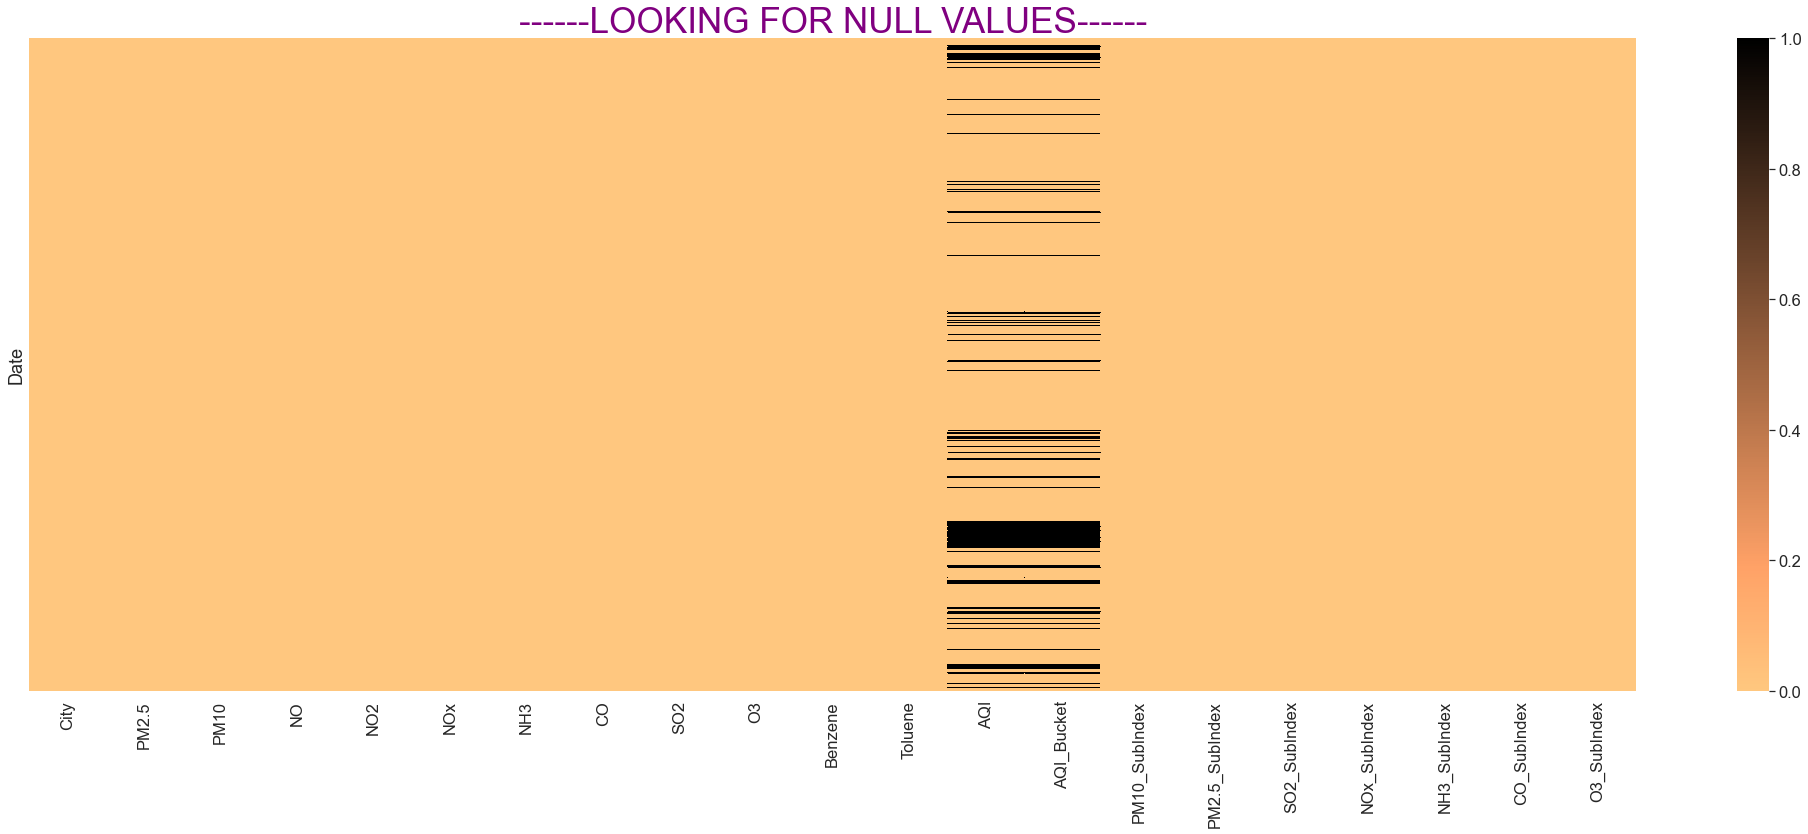

In [26]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(city_day.isnull(),cmap = 'copper_r',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

* Now this data frame is having sub-indexes of 7 major pollutants
______________________________________________________________________________________________________________________________

### Calculating AQI with max. of sub-indexes calculated

In [27]:
city_day["AQI"] = city_day["AQI"].fillna(round(city_day[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex",
                                                         "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex",
                                                         "O3_SubIndex"]].max(axis = 1)))

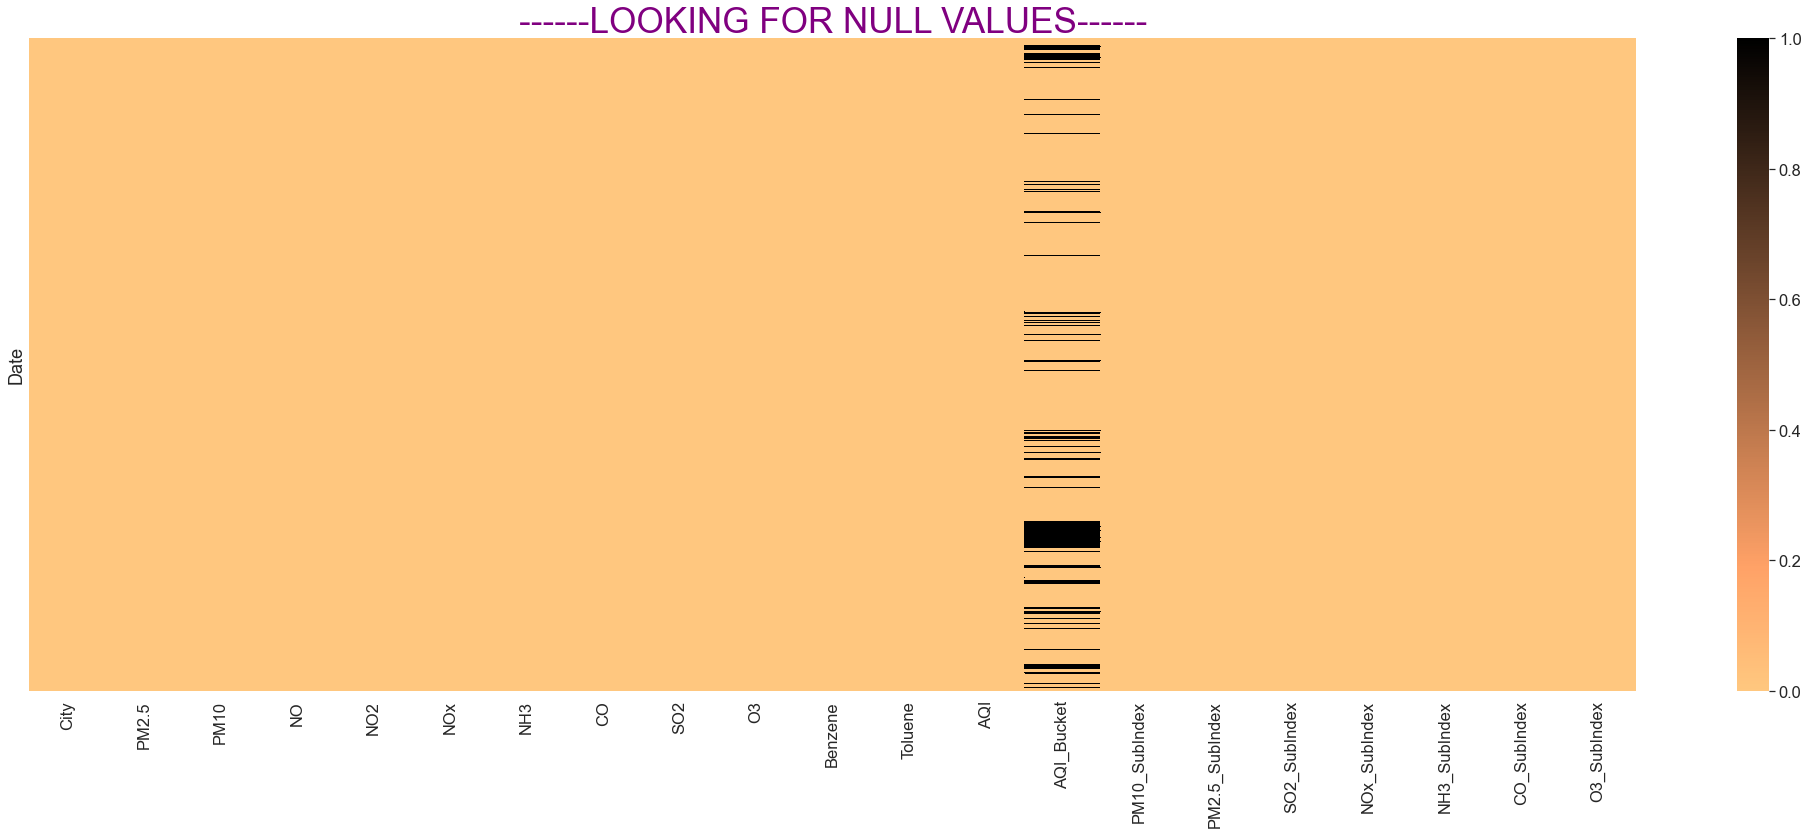

In [28]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(city_day.isnull(),cmap = 'copper_r',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

##### *Here black colour in the heatmap represents the null values in it. This is because the 'AQI_Bucket' will be categorized by the AQI calculated. It will be done by some conditions. According to Central Pollution Control Board every level of the AQI has its own category like if AQI ranges from 0-50 will be considered as "Good", 51-100 will be "Moderate" and so on.

## AQI table
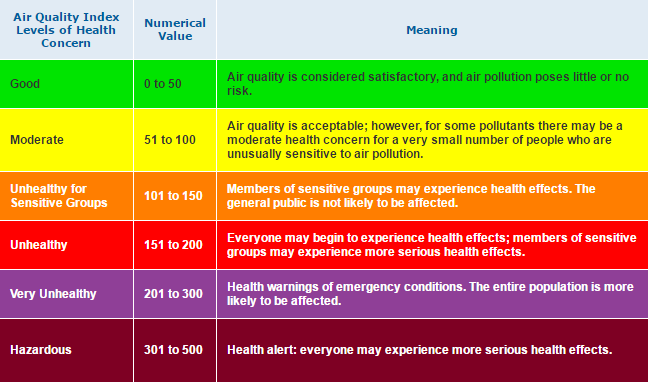

#### ****Above image shows the meaning and quality of air according to the range of AQI.

### *AQI bucketing with AQI calculated.

In [29]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
city_day["AQI_Bucket"] = city_day["AQI_Bucket"].fillna(city_day["AQI"].apply(lambda x: get_AQI_bucket(x)))

### *Cleaned data after analysis

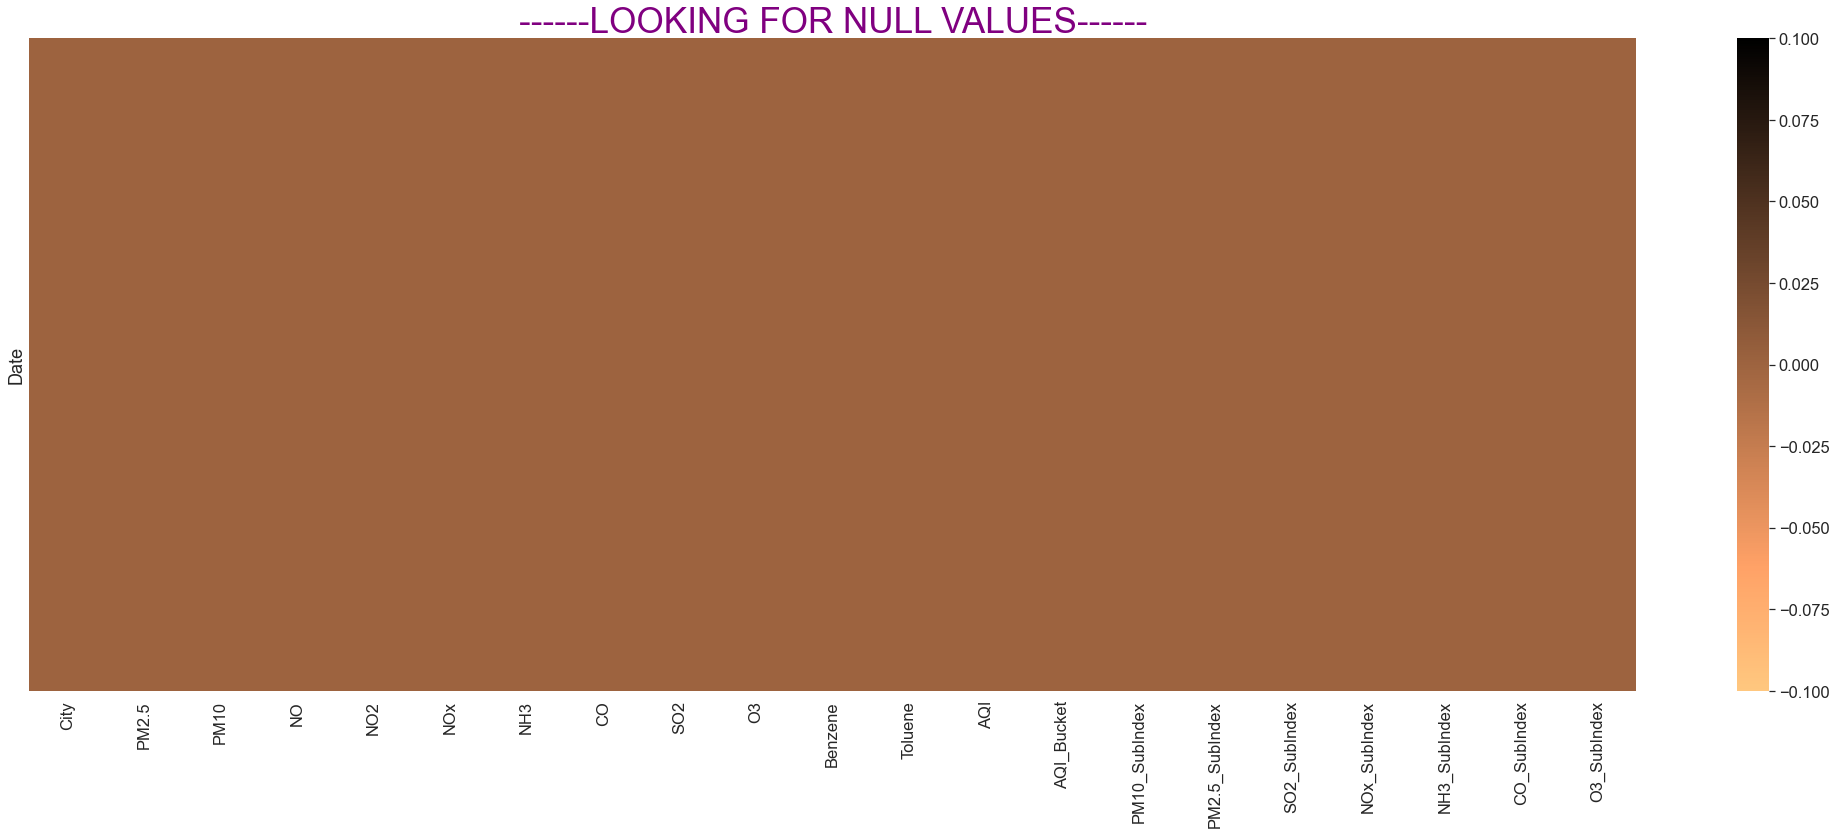

In [30]:
plt.figure(figsize=(36,12))
sns.set(font_scale=1.5)
sns.heatmap(city_day.isnull(),cmap = 'copper_r',yticklabels=False)
plt.title('------LOOKING FOR NULL VALUES------',{'fontsize':35,'color':'purple'})
plt.show()

*Brown clour represents that there is no null values in dataset

In [31]:
df_city_day = city_day.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'PM10_SubIndex',
       'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [32]:
df_city_day

City      PM2.5        PM10     NO    NO2    NOx  \
Date                                                                    
2015-01-01      Ahmedabad  67.854497  114.584029   0.92  18.22  17.15   
2015-01-02      Ahmedabad  67.854497  114.584029   0.97  15.69  16.46   
2015-01-03      Ahmedabad  67.854497  114.584029  17.40  19.30  29.70   
2015-01-04      Ahmedabad  67.854497  114.584029   1.70  18.48  17.97   
2015-01-05      Ahmedabad  67.854497  114.584029  22.10  21.42  37.76   
...                   ...        ...         ...    ...    ...    ...   
2020-06-27  Visakhapatnam  15.020000   50.940000   7.68  25.06  19.54   
2020-06-28  Visakhapatnam  24.380000   74.090000   3.42  26.06  16.53   
2020-06-29  Visakhapatnam  22.910000   65.730000   3.45  29.53  18.33   
2020-06-30  Visakhapatnam  16.640000   49.970000   4.05  29.26  18.80   
2020-07-01  Visakhapatnam  15.000000   66.000000   0.40  26.85  14.05   

                  NH3     CO    SO2      O3  ...    Toluene    AQI  \
Date                                         ...                     
2015-01-01  23.024137   0.92  27.64  133.36  ...   0.020000  149.0   
2015-01-02  23.024137   0.97  24.55   34.06  ...   5.500000  123.0   
2015-01-03  23.024137  17.40  29.07   30.70  ...  16.400000  300.0   
2015-01-04  23.024137   1.70  18.59   36.08  ...  10.140000  123.0   
2015-01-05  23.024137  22.10  39.33   39.31  ...  18.890000  329.0   
...               ...    ...    ...     ...  ...        ...    ...   
2020-06-27  12.470000   0.47   8.55   23.30  ...  12.070000   41.0   
2020-06-28  11.990000   0.52  12.72   30.14  ...   2.210000   70.0   
2020-06-29  10.710000   0.48   8.42   30.96  ...   0.010000   68.0   
2020-06-30  10.030000   0.52   9.84   28.30  ...   0.000000   54.0   
2020-07-01   5.200000   0.59   2.10   17.05  ...   8.350983   50.0   

              AQI_Bucket PM10_SubIndex  PM2.5_SubIndex  SO2_SubIndex  \
Date                                                                   
2015-01-01      Moderate    109.333333      123.333333         33.75   
2015-01-02      Moderate    109.333333      123.333333         30.00   
2015-01-03          Poor    109.333333      123.333333         36.25   
2015-01-04      Moderate    109.333333      123.333333         22.50   
2015-01-05     Very Poor    109.333333      123.333333         48.75   
...                  ...           ...             ...           ...   
2020-06-27          Good     50.000000       25.000000         10.00   
2020-06-28  Satisfactory     74.000000       40.000000         15.00   
2020-06-29  Satisfactory     65.000000       36.666667         10.00   
2020-06-30  Satisfactory     49.000000       26.666667         11.25   
2020-07-01          Good     66.000000       25.000000          2.50   

            NOx_SubIndex  NH3_SubIndex  CO_SubIndex  O3_SubIndex  
Date                                                              
2015-01-01         21.25          5.75     0.000000   148.529412  
2015-01-02         20.00          5.75     0.000000    34.000000  
2015-01-03         36.25          5.75   300.000000    30.000000  
2015-01-04         21.25          5.75    50.000000    36.000000  
2015-01-05         46.25          5.75   329.411765    39.000000  
...                  ...           ...          ...          ...  
2020-06-27         23.75          3.00     0.000000    23.000000  
2020-06-28         20.00          2.75     0.000000    30.000000  
2020-06-29         22.50          2.50     0.000000    30.000000  
2020-06-30         22.50          2.50     0.000000    28.000000  
2020-07-01         17.50          1.25     0.000000    17.000000  

[29531 rows x 21 columns]

####  Correlation heatmap with annotaion 

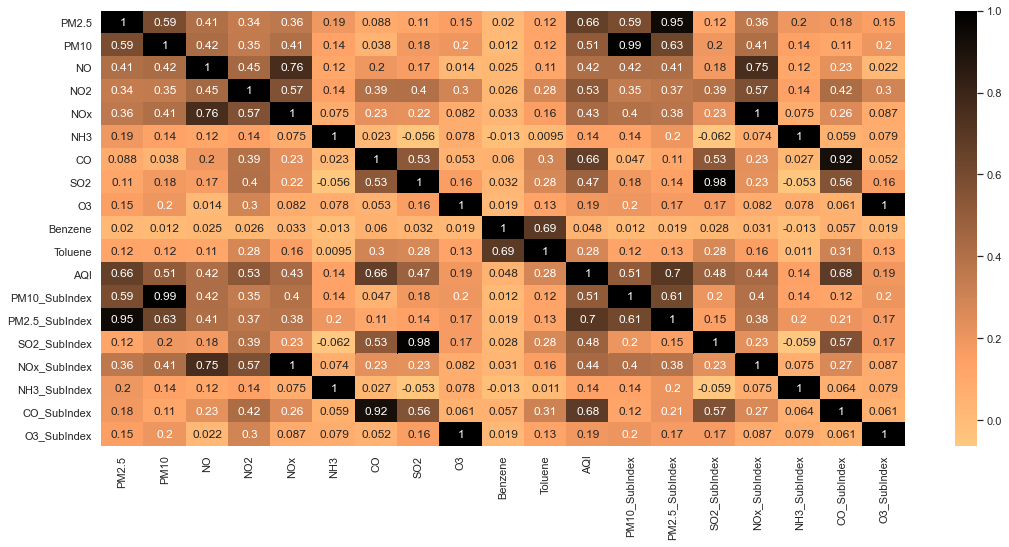

In [33]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1)
sns.heatmap(city_day.corr(),cmap='copper_r',annot=True);

##### *This heatmap is having all the polllutants and their sub-indexe. The darker the intersection is the positive the correlation is and vice-versa. (1 represents positively correlated and 0 is negatively corerlated).

# **VISUALIZING DATA

#### *1 Line graph of AQI calculated of last 5 years.

Text(0.5, 1.0, 'LINE GRAPH OF AQI CALCULATED')

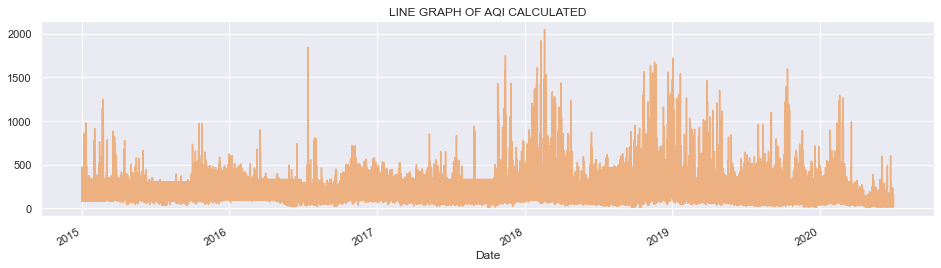

In [34]:
df_city_day["AQI"].plot(figsize=(16,4), cmap = 'flare')
plt.title('LINE GRAPH OF AQI CALCULATED')

In [35]:
# AQI_map = folium.Map(location =[20.593683,78.962883],zoom_start = 4)
# AQI_map

#### *2.Level of pollutants by year 

<AxesSubplot:xlabel='Date'>

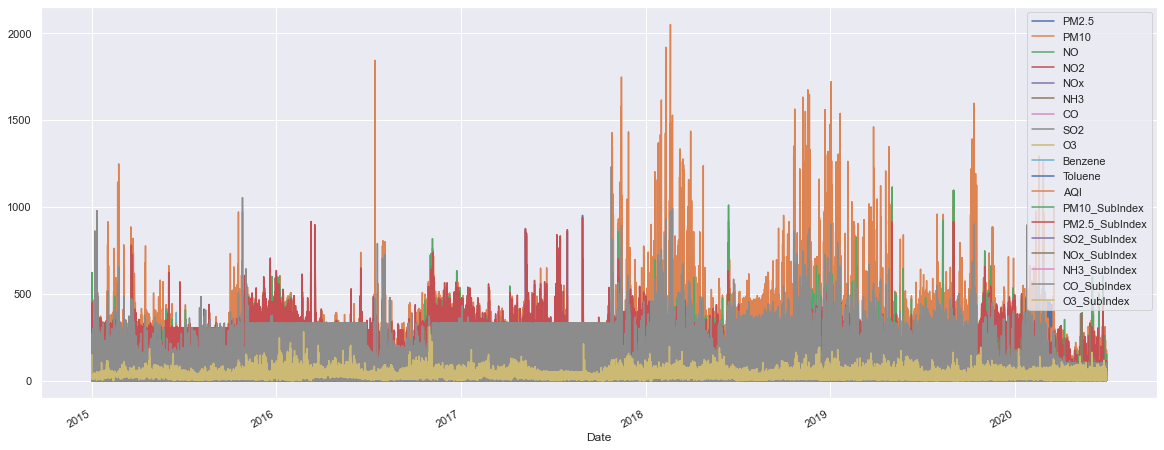

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df_city_day.plot()

##### *This line graph represents the density of all pollutants for 5 years and this is clear that PM10 is very high after 2018. 

In [37]:
# df_city_day.columns

#### *3.Pollutants frequency line graph

Distribution of different pollutants in last 5 years


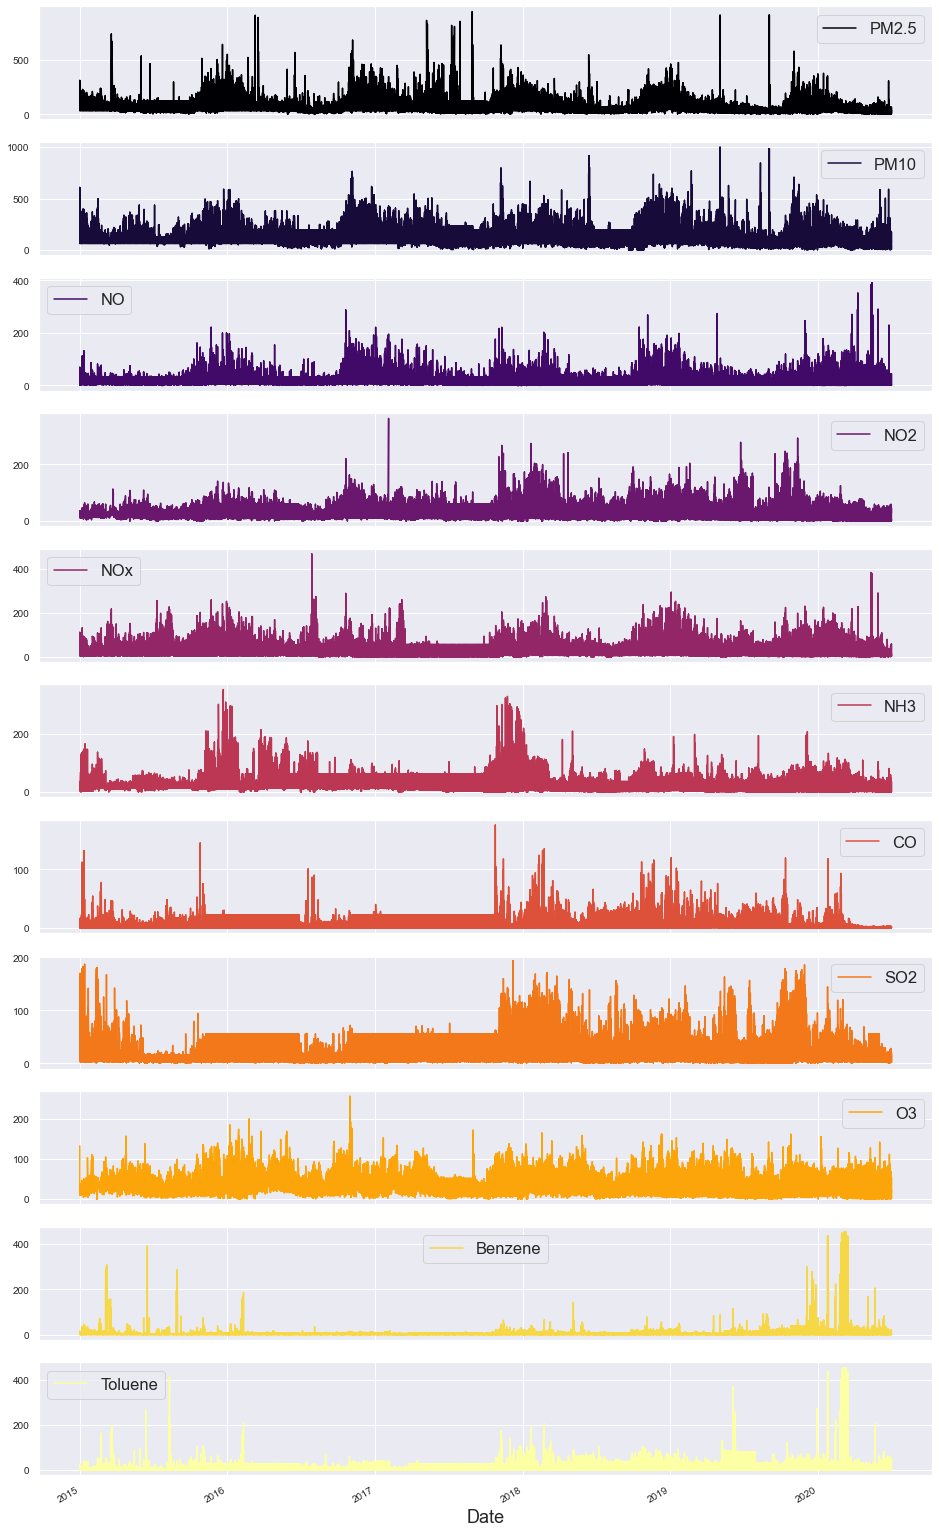

In [38]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']
df_city_day = df_city_day[pollutants]
sns.set(font_scale=1.5)
print('Distribution of different pollutants in last 5 years')
df_city_day.plot(kind='line',figsize=(16,30),cmap='inferno',subplots=True,fontsize=10);

In [39]:
# city_day.head(3)

#### *4. Average AQI of states in last 5 years

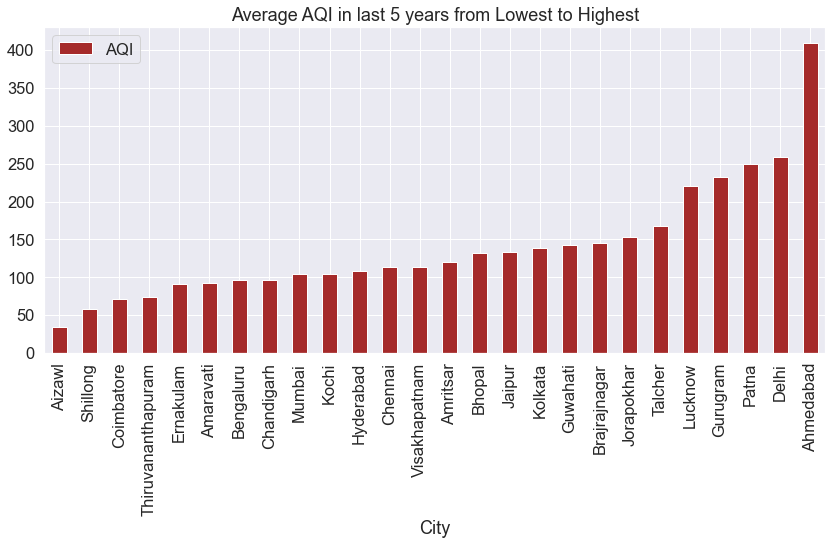

In [40]:
city_day[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='copper_r',figsize=(14,6),color = 'Brown')
plt.title('Average AQI in last 5 years from Lowest to Highest');
sns.set(font_scale=1.5)

#### 5. This bar graph combination of range of categories of AQI in all cities.

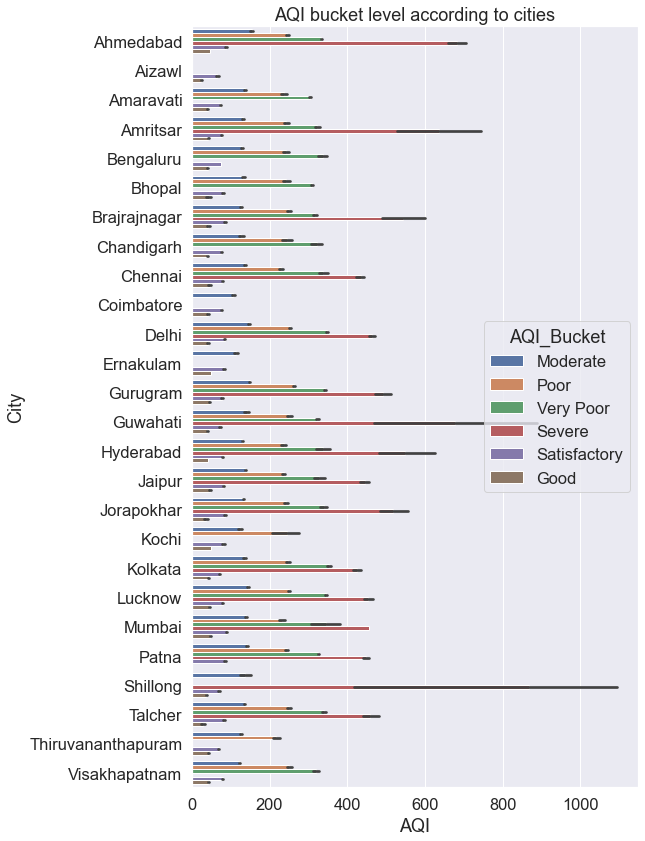

In [41]:
plt.figure(figsize=(8,14))
sns.set(font_scale=1.5)
sns.barplot(city_day['AQI'],city_day['City'],city_day['AQI_Bucket'])
plt.title('AQI bucket level according to cities');



##### *Here ahemdabad has very high severity of AQI. whereas other cities has less severe environment.

#### 6. Bar graph of AQI categories with highest AQI.  

<BarContainer object of 29531 artists>

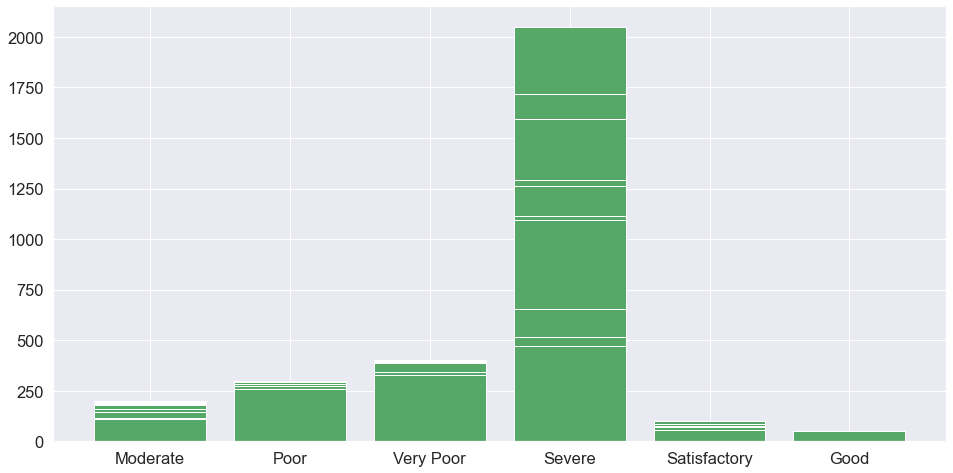

In [42]:
import plotly.graph_objects as go
plt.figure(figsize=(16,8))

plt.bar(city_day['AQI_Bucket'],city_day['AQI'],color = 'g')

*The severity of AQI seems very high mainly around 500 and reaching more than 2000. which is very very dangerous.

#### 7. Countplot of categories of AQI

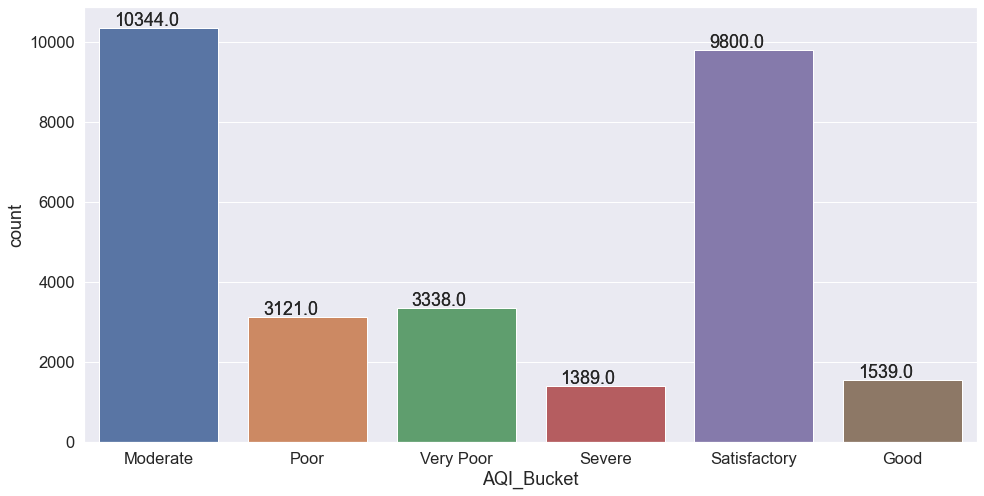

In [43]:
plt.figure(figsize=(16,8))
BB = sns.countplot(x="AQI_Bucket", data=city_day)
sns.countplot(x="AQI_Bucket", data=city_day)
for p in BB.patches:
        BB.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

#### 8. Box plotting of every pollutant with levels of AQI's category.

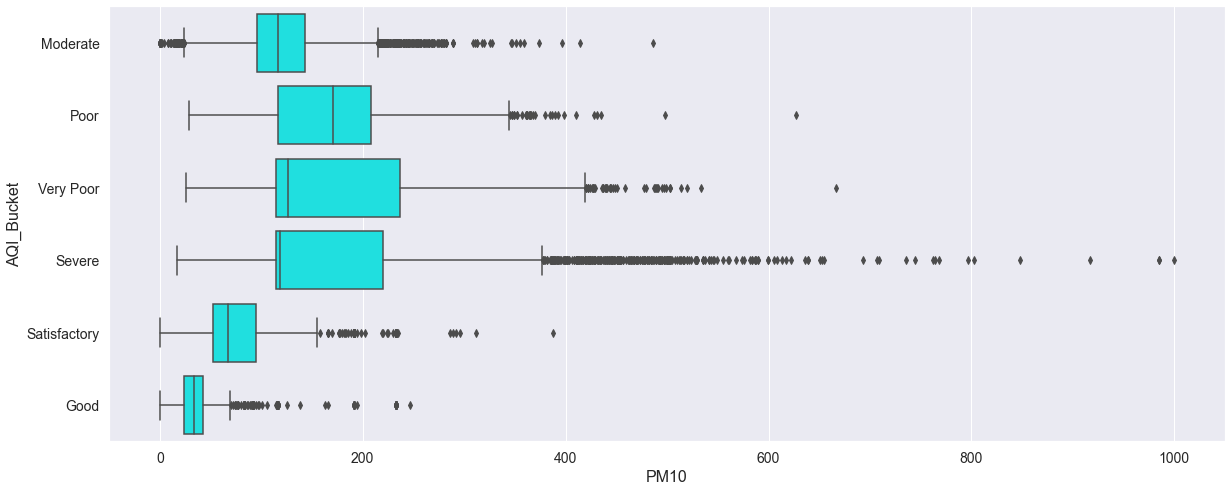

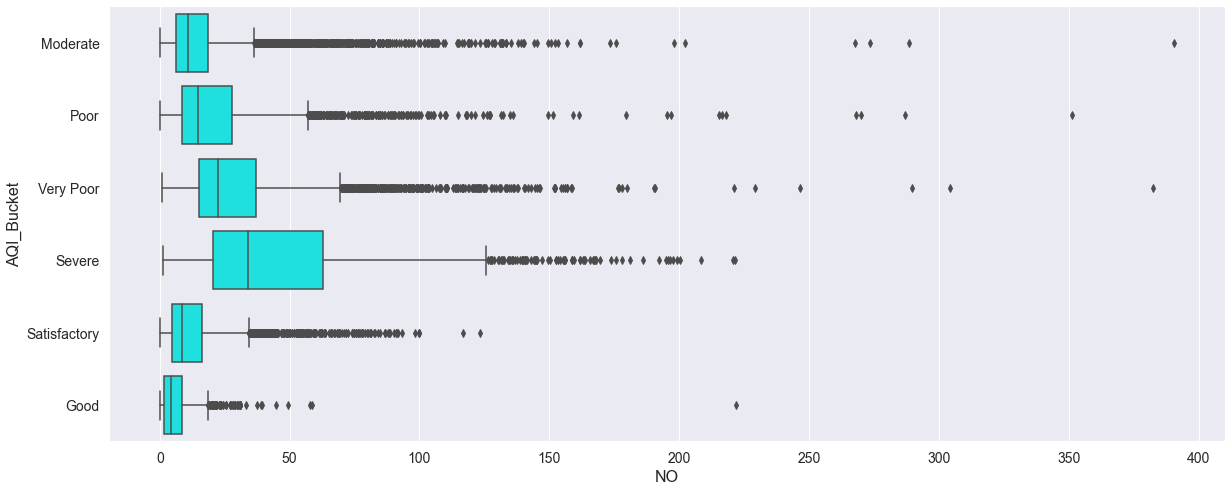

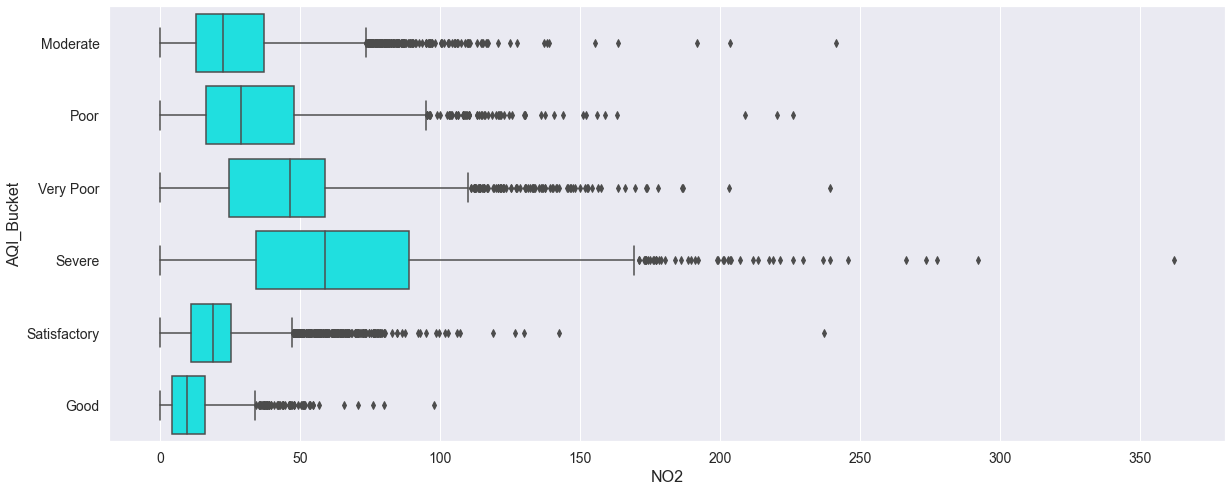

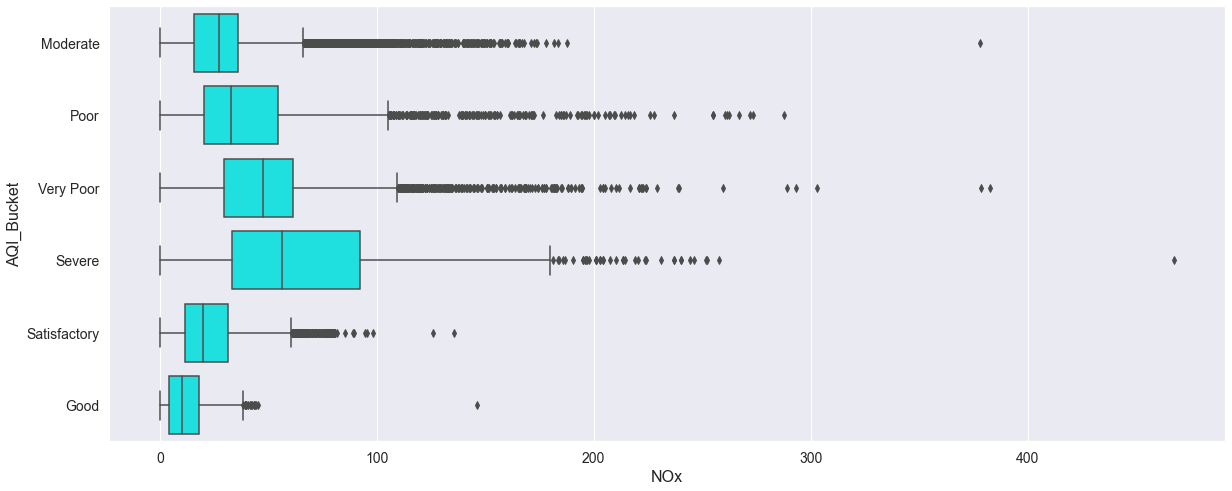

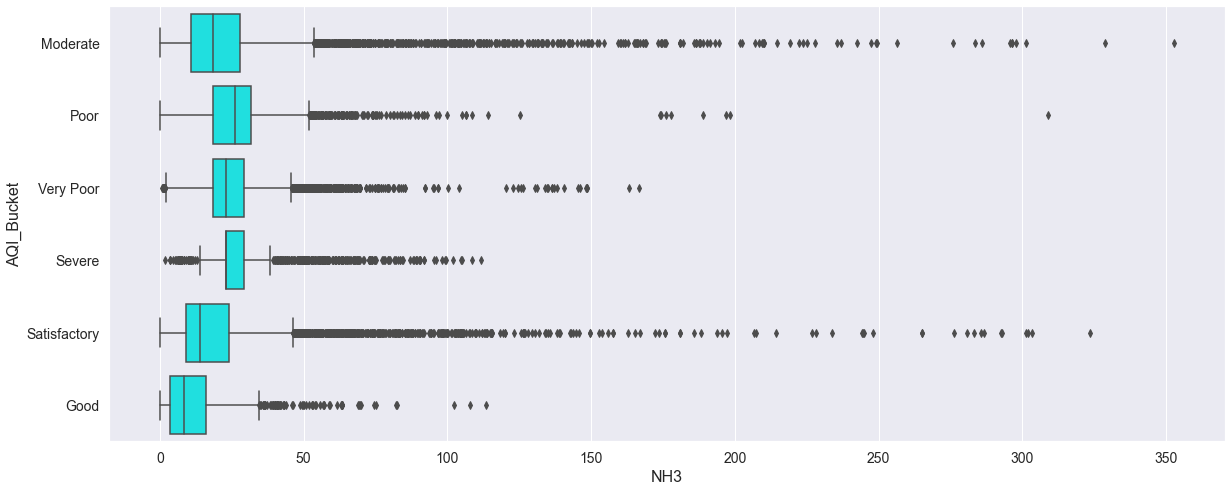

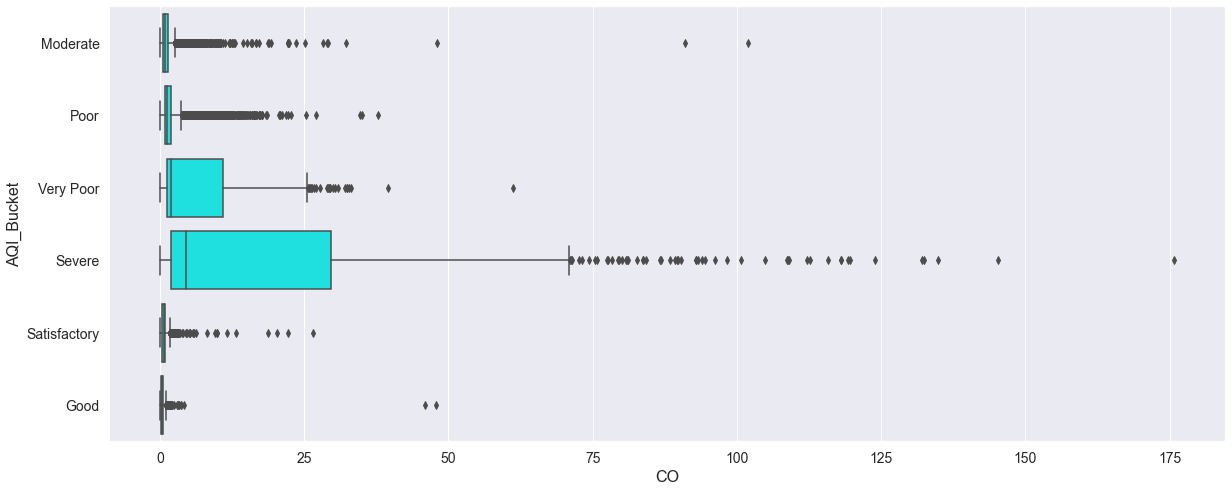

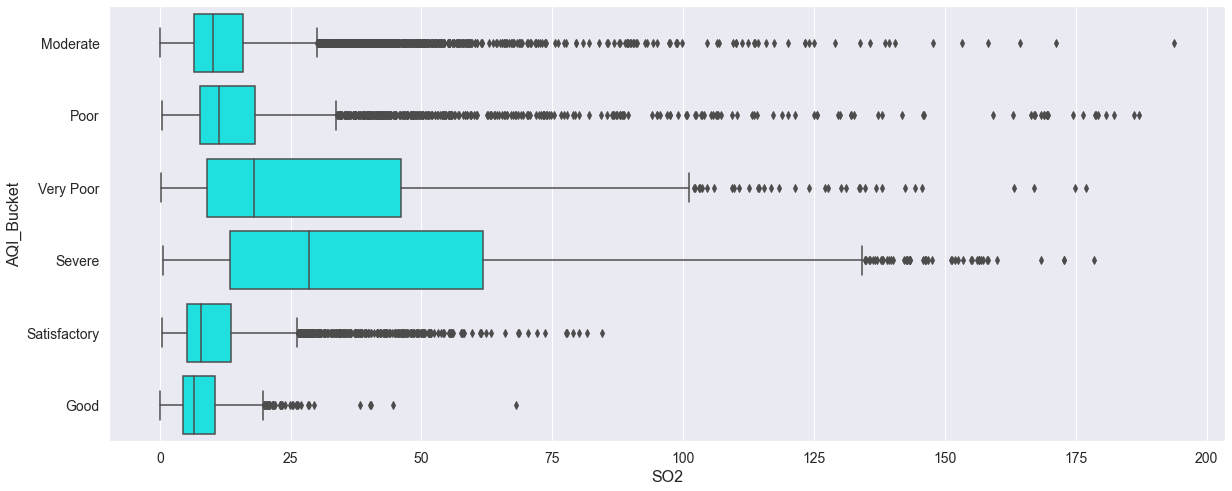

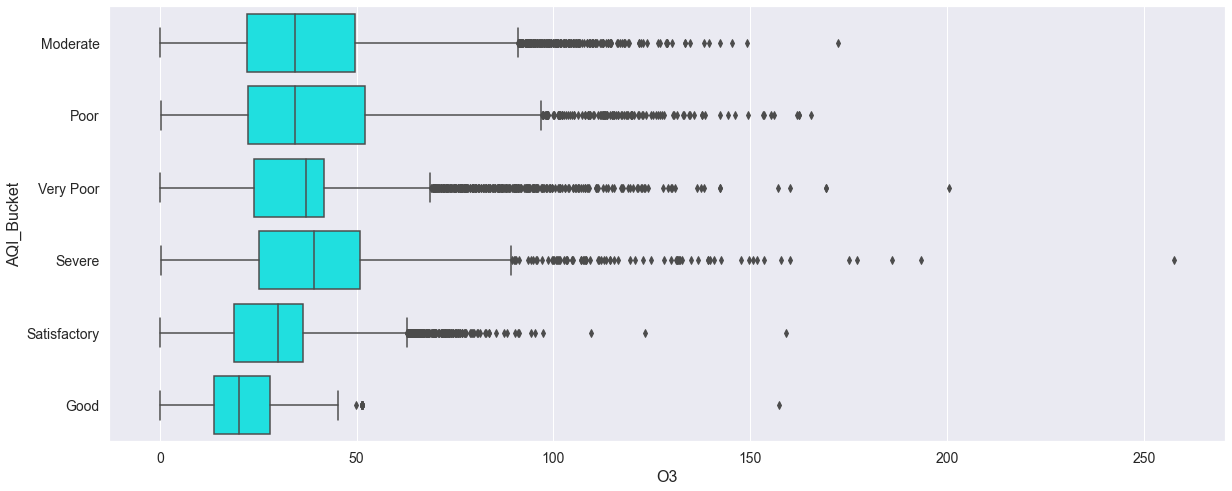

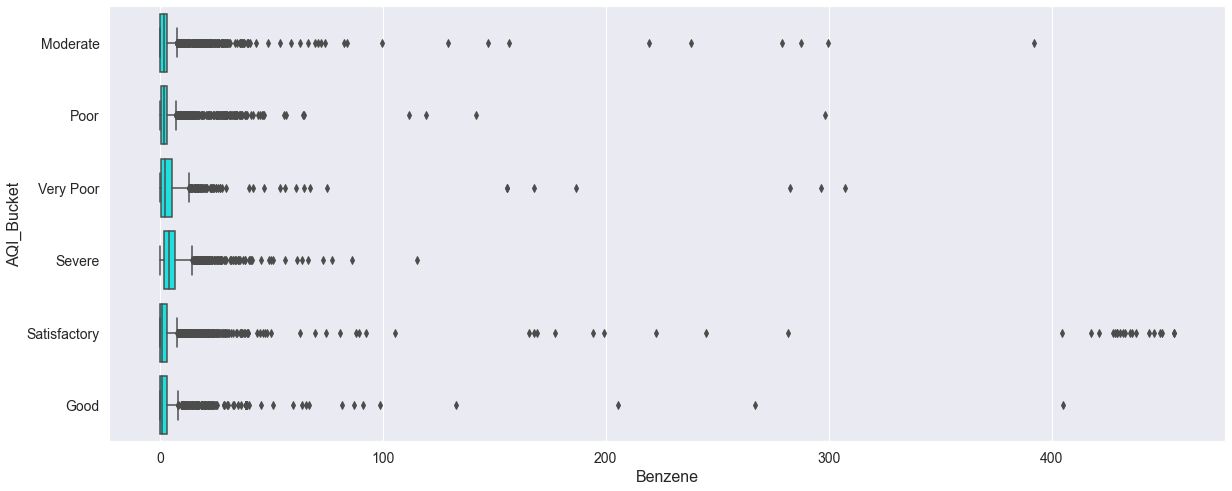

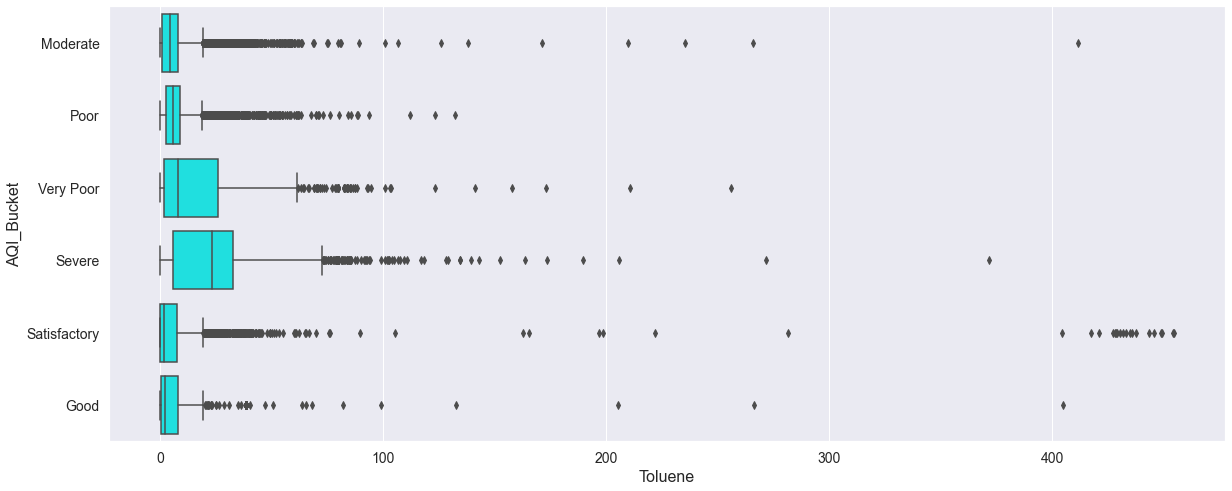

In [44]:
def boxplot_city_day(y_var):
    boxplot_city_day = city_day.drop(y_var, axis = 1)
    i = boxplot_city_day.columns
    
    
    plot = sns.boxplot(i[2], y_var, data = city_day, color = 'aqua')#, edgecolor = 'b
    plt.xlabel('{}'.format(i[2]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[3], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[3]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[4], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[4]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[5], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[5]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[6], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[6]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[7], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[7]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[8], y_var, data =city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[8]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[9], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[9]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[10], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[10]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    
    plot = sns.boxplot(i[11], y_var, data = city_day, color = 'aqua')
    plt.xlabel('{}'.format(i[11]), fontsize = 16)
    plt.ylabel('AQI_Bucket', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    

boxplot_city_day('AQI_Bucket')

--------------------------------------------------------------------------------------------------
## **STORING TARGET VALUES FOR INDEPENDENT AND DEPENDENT VARIABLES.
-------------------------------------------------

In [45]:
final_df= city_day[['AQI', 'AQI_Bucket']].copy()
final_df

AQI    AQI_Bucket
Date                           
2015-01-01  149.0      Moderate
2015-01-02  123.0      Moderate
2015-01-03  300.0          Poor
2015-01-04  123.0      Moderate
2015-01-05  329.0     Very Poor
...           ...           ...
2020-06-27   41.0          Good
2020-06-28   70.0  Satisfactory
2020-06-29   68.0  Satisfactory
2020-06-30   54.0  Satisfactory
2020-07-01   50.0          Good

[29531 rows x 2 columns]

In [46]:
#final_df = pd.get_dummies(final_df)
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :1, 'Satisfactory' :2, 'Moderate' :3, 'Poor' :4, 'Very Poor' :5, 'Severe' :6}).astype(int) #mapping numbers
final_df.head()

AQI  AQI_Bucket
Date                         
2015-01-01  149.0           3
2015-01-02  123.0           3
2015-01-03  300.0           4
2015-01-04  123.0           3
2015-01-05  329.0           5

In [47]:
X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [48]:
X

AQI
Date             
2015-01-01  149.0
2015-01-02  123.0
2015-01-03  300.0
2015-01-04  123.0
2015-01-05  329.0
...           ...
2020-06-27   41.0
2020-06-28   70.0
2020-06-29   68.0
2020-06-30   54.0
2020-07-01   50.0

[29531 rows x 1 columns]

In [49]:
city_day.shape

(29531, 21)

In [50]:
df=X.resample(rule='MS').sum()

In [51]:
df.shape

(67, 1)

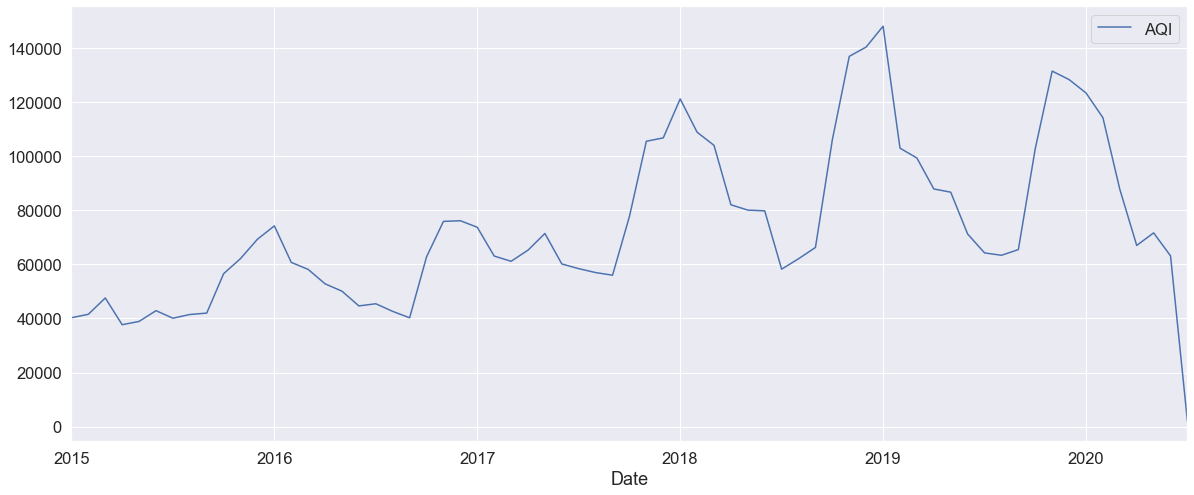

In [52]:
df.plot()
rcParams['figure.figsize'] = 14,6

##### This is whole data which will next be used for time series analysis.

In [53]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

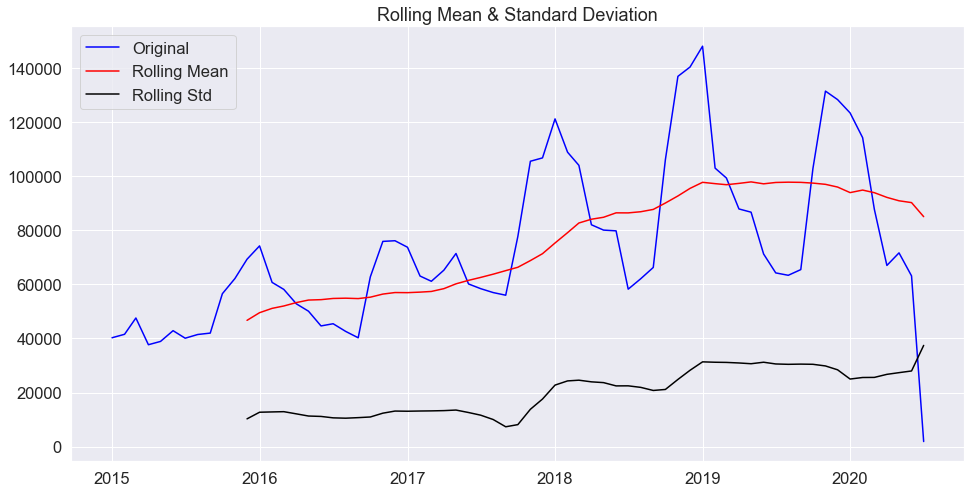

Results of Dickey-Fuller Test:
Test Statistic                 -1.413833
p-value                         0.575627
#Lags Used                     10.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [54]:
test_stationarity(df.iloc[:,0])

# Seasonal decomposing.

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

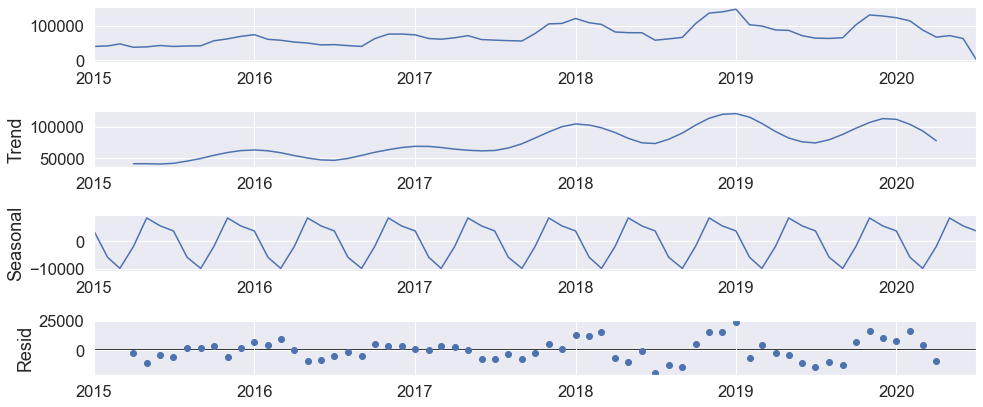

In [57]:
seasonal_decompose(df,model='additive',freq=6).plot();
rcParams['figure.figsize'] = 12,8

In [58]:
train=df[:50] #till feb2020
test=df[50:] # from feb2020

In [59]:
test

AQI
Date                
2019-03-01   99289.0
2019-04-01   87857.0
2019-05-01   86668.0
2019-06-01   71212.0
2019-07-01   64228.0
2019-08-01   63342.0
2019-09-01   65446.0
2019-10-01  102773.0
2019-11-01  131411.0
2019-12-01  128275.0
2020-01-01  123345.0
2020-02-01  114195.0
2020-03-01   87722.0
2020-04-01   66980.0
2020-05-01   71628.0
2020-06-01   63117.0
2020-07-01    1904.0

# ARIMA MODEL
---------------------------------

*(ACF) Auto correlation function

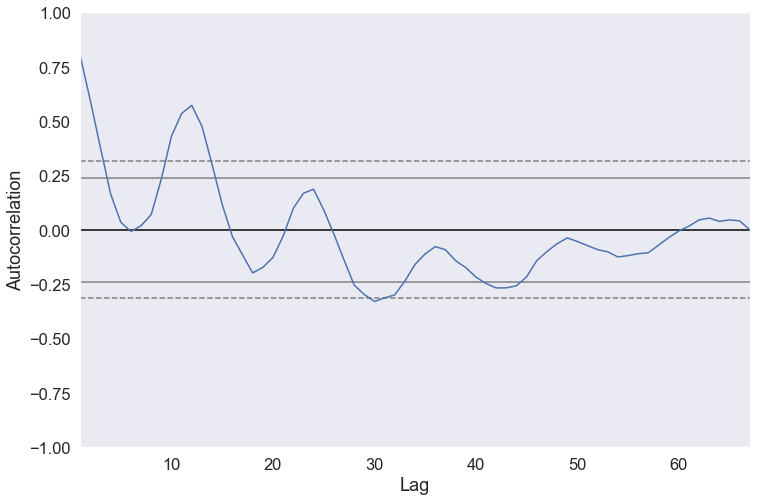

In [60]:
import pandas
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AQI'])
plt.show()


In [61]:
model=ARIMA(df['AQI'],order=(2,2,3),seasonal_order=(2,2,3,12))
model_fit=model.fit()
import warnings
warnings.filterwarnings("ignore")

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              AQI   No. Observations:                   67
Model:             ARIMA(2, 2, 3)x(2, 2, 3, 12)   Log Likelihood                -448.634
Date:                          Tue, 04 Jan 2022   AIC                            919.269
Time:                                  00:34:35   BIC                            938.118
Sample:                              01-01-2015   HQIC                           926.133
                                   - 07-01-2020                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1467      3.468     -0.042      0.966      -6.943       6.650
ar.L2          0.3816      1.286      0.297      0.767      -2.140       2.903
ma.L1         -1.3186      3.626     -0.364      0.716      -8.425       5.788
ma.L2         -0.0727      6.717     -0.011      0.991     -13.238      13.093
ma.L3          0.5280      3.416      0.155      0.877      -6.168       7.224
ar.S.L12      -1.1159     10.145     -0.110      0.912     -21.000      18.768
ar.S.L24      -0.4735      5.516     -0.086      0.932     -11.286      10.339
ma.S.L12      -0.4730      9.991     -0.047      0.962     -20.056      19.110
ma.S.L24       0.1260     10.606      0.012      0.991     -20.660      20.912
ma.S.L36      -0.0405      7.024     -0.006      0.995     -13.807      13.726
sigma2      3.737e+08   8.97e-08   4.17e+15      0.000    3.74e+08    3.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.97   Prob(JB):                         0.82
Heteroskedasticity (H):               1.72   Skew:                             0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.8e+32. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

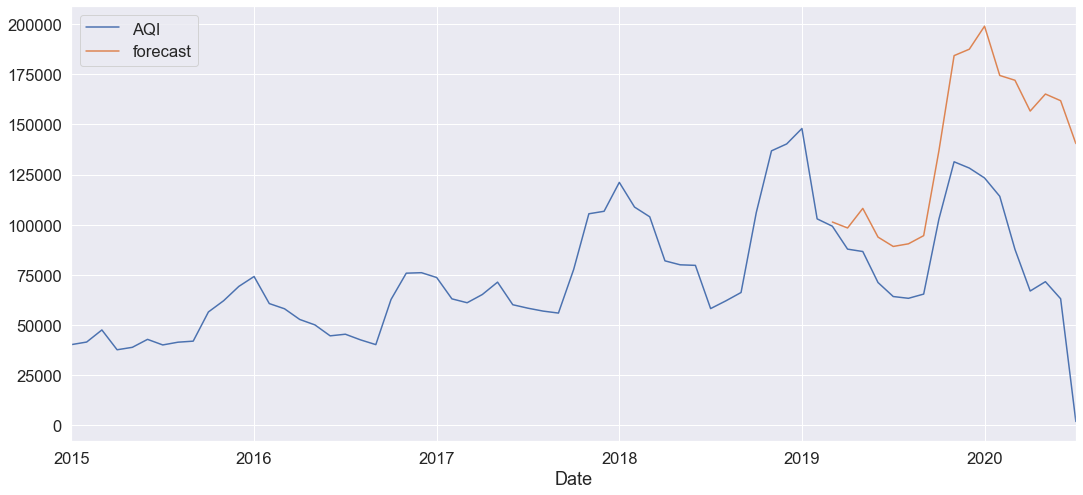

In [63]:
df['forecast']=model_fit.predict(start=50,end=80,dynamic=True)
df[['AQI','forecast']].plot(figsize=(18,8))

##### ***As  the data is seasonal then ARIMA model seems very less applicable to this data.

# SARIMAX MODEL
----------------------------------

In [64]:
import statsmodels.api as sm

In [65]:
model=sm.tsa.statespace.SARIMAX(df['AQI'],order=(2, 2, 2),seasonal_order=(1,2,2,12))
results = model.fit()

<AxesSubplot:xlabel='Date'>

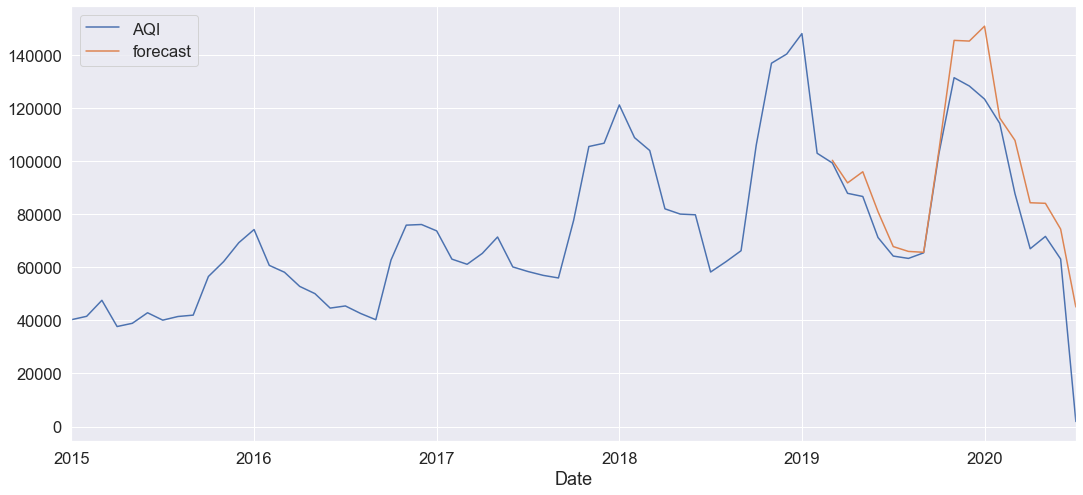

In [66]:
df['forecast']=results.predict(start=50,end=80,dynamic=True)
df[['AQI','forecast']].plot(figsize=(18,8))

##### ***As the data is seasonal. so the SARIMAX modelling will be perfect for this time series analysis and forecasting.

## DATEOFFSET
-------------------------------
##### *Dateoffsets are a standard kind of date increment used for a date range in Pandas. It works exactly like relativedelta in terms of the keyword args we pass in. DateOffsets can be created to move dates forward a given number of valid dates. For example, Bday(2) can be added to a date to move it two business days forward. If the date does not start on a valid date, first it is moved to a valid date and then offset is created but Here! we are going to increment many months in this dataset.

In [67]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,13)]

In [68]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [69]:
future_datest_df.tail()


AQI forecast
2021-03-01  NaN      NaN
2021-04-01  NaN      NaN
2021-05-01  NaN      NaN
2021-06-01  NaN      NaN
2021-07-01  NaN      NaN

In [70]:
future_df=pd.concat([df,future_datest_df])


<AxesSubplot:>

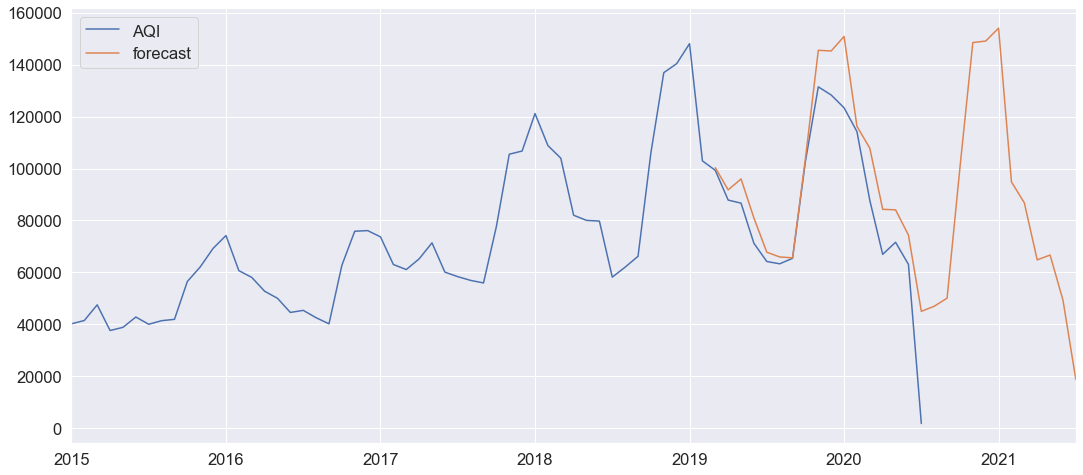

In [71]:
future_df['forecast'] = results.predict(start = 50, end = 80, dynamic= True)  
future_df[['AQI', 'forecast']].plot(figsize=(18, 8)) 

#### *

# **Final future prediction

In [72]:
future_df/100

AQI    forecast
2015-01-01  402.58         NaN
2015-02-01  415.39         NaN
2015-03-01  475.62         NaN
2015-04-01  376.83         NaN
2015-05-01  389.02         NaN
...            ...         ...
2021-03-01     NaN  867.802775
2021-04-01     NaN  648.480518
2021-05-01     NaN  667.189633
2021-06-01     NaN  493.639442
2021-07-01     NaN  187.917838

[79 rows x 2 columns]

---------------------------------------------------------
## **TIME SERIES PREDICTION OF RISE OF POLLUTION IN DIFFRENT CITIES.
_________________________________________________________________________________
### ARIMA Model is used for this prediction 
------------------------------------------------------------------------
#### **Plotting is done on cities (one-by-one). In first plot data splitting is plotted with blue and grey line. where blue shows training dataset and grey is testing dataset and in second graph ARIMA prediction is plotted with 'Black' line where pink is training and green is testing dataset and so on.

In [73]:
city_day['Date'] = city_day.index
city_day = city_day.reset_index(drop=True)

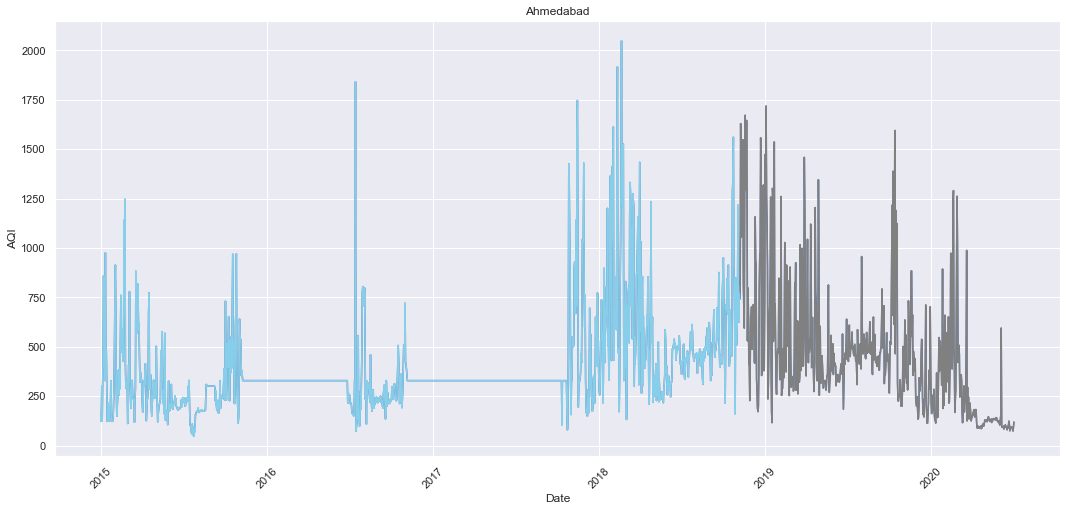

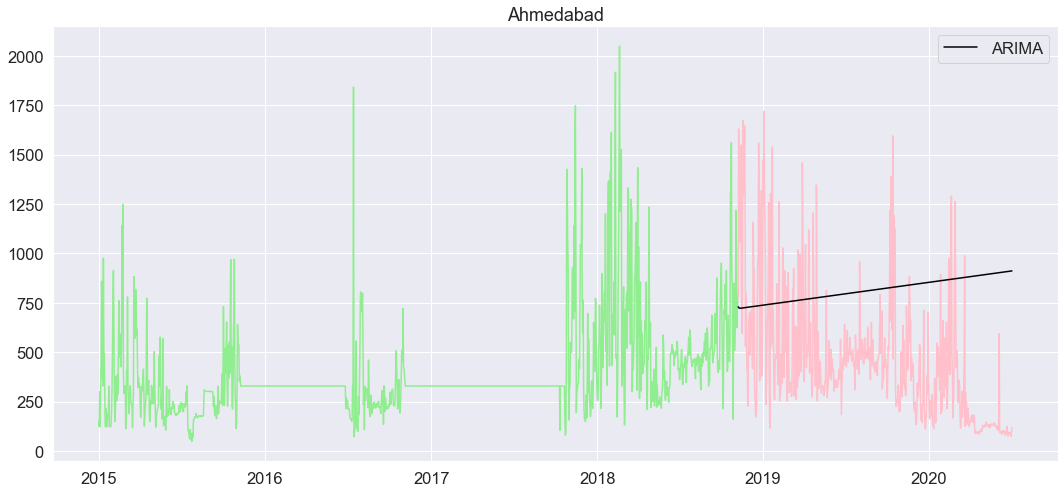

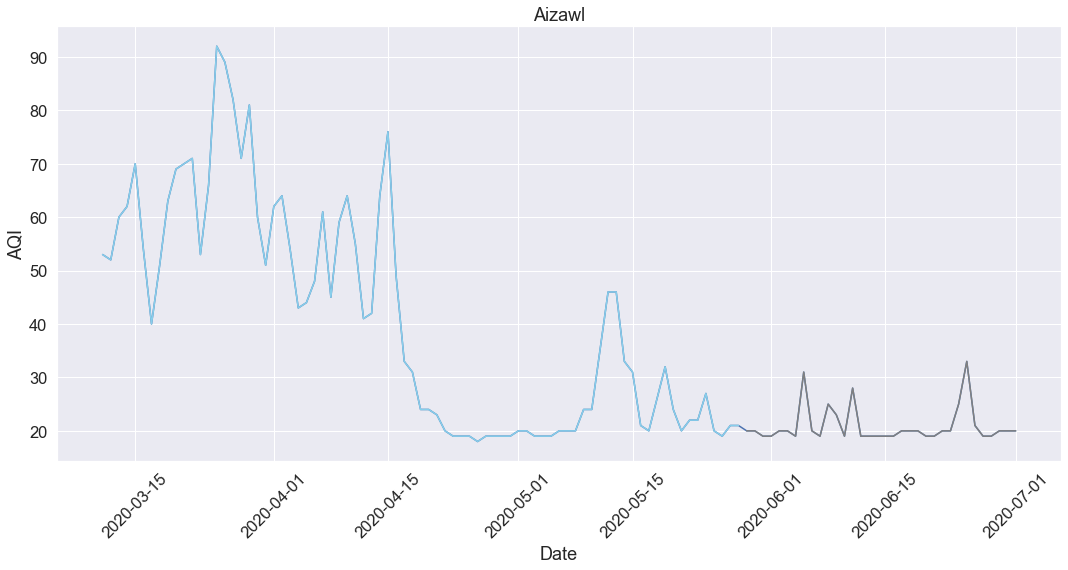

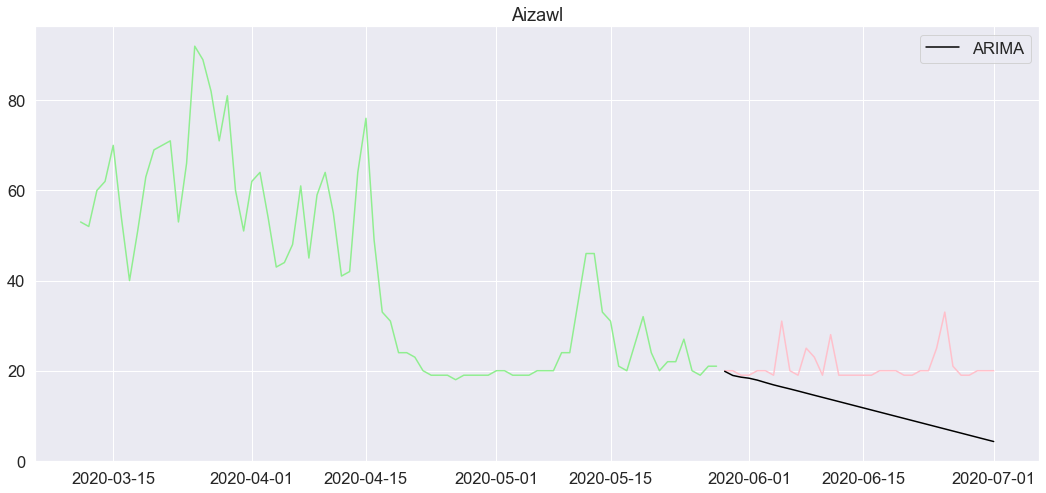

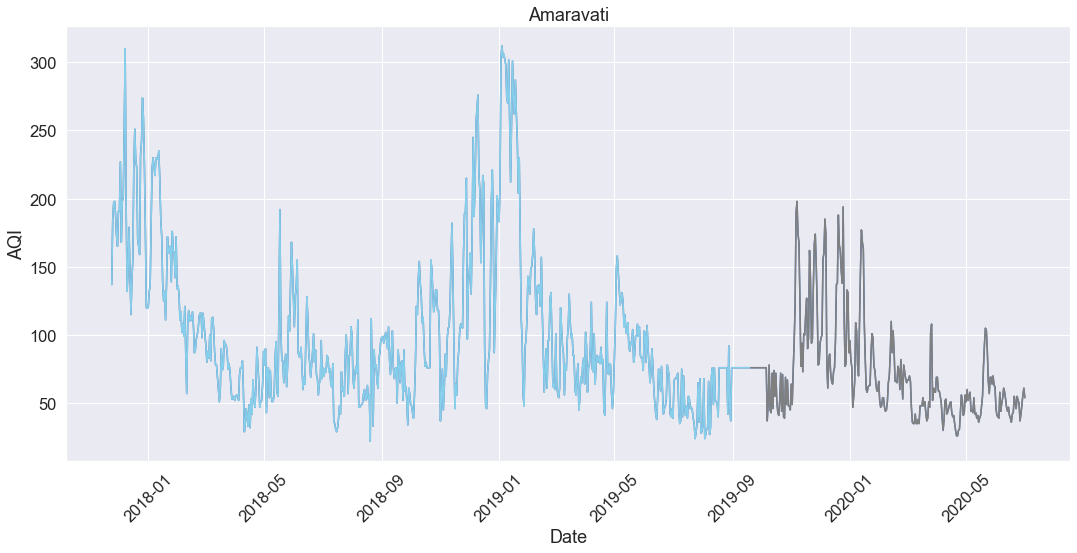

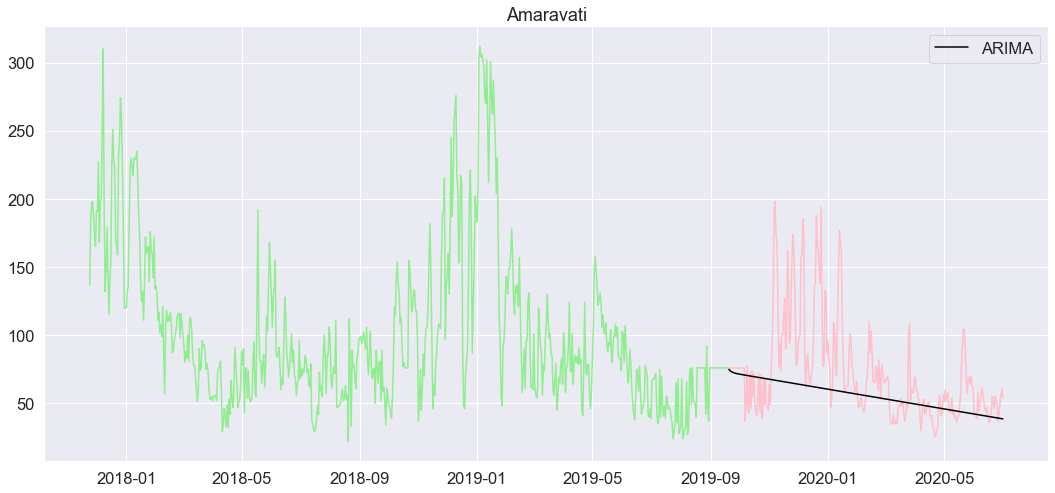

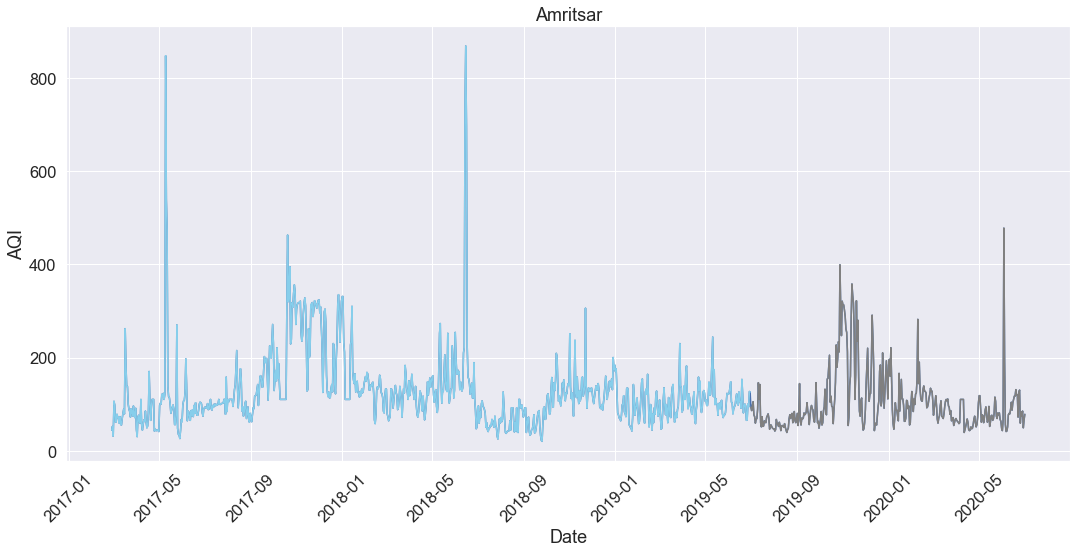

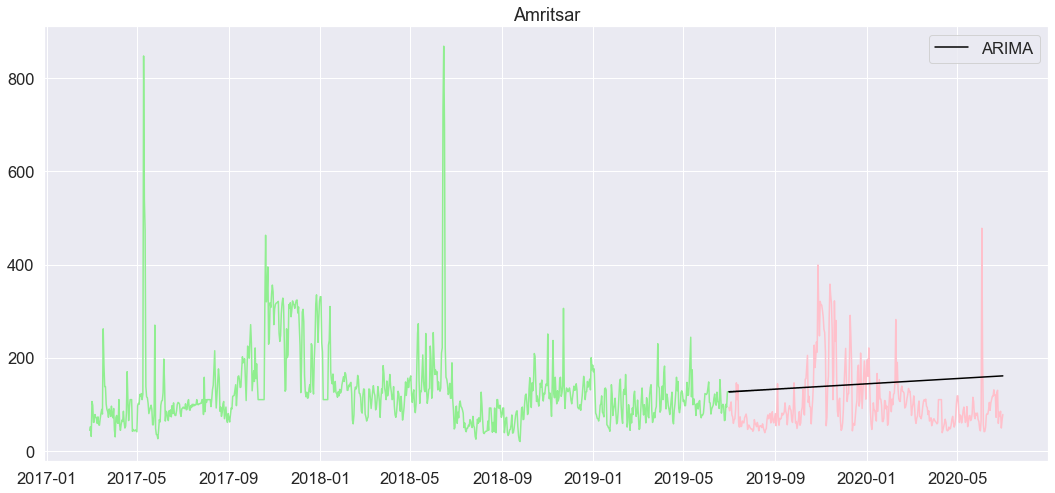

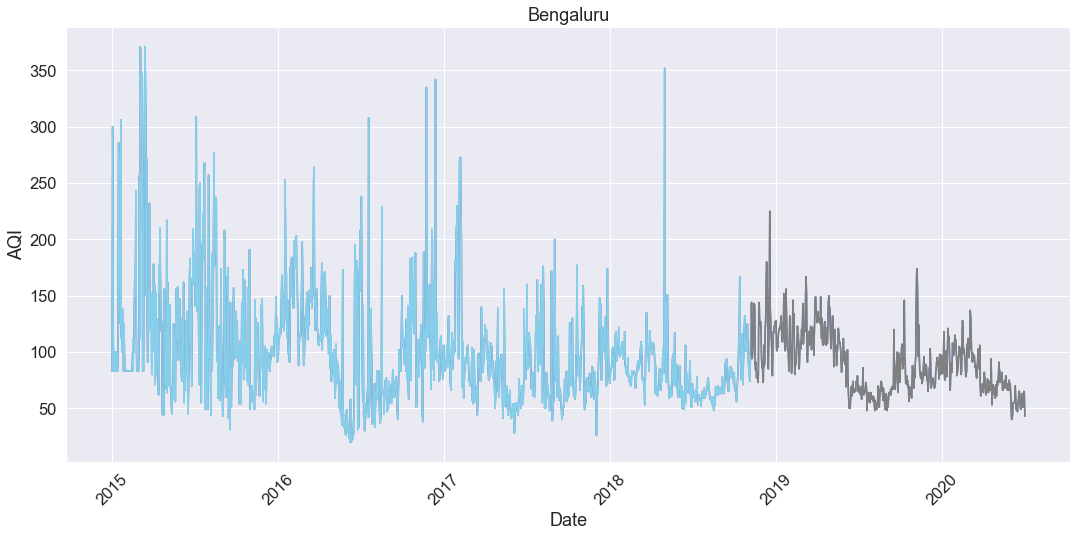

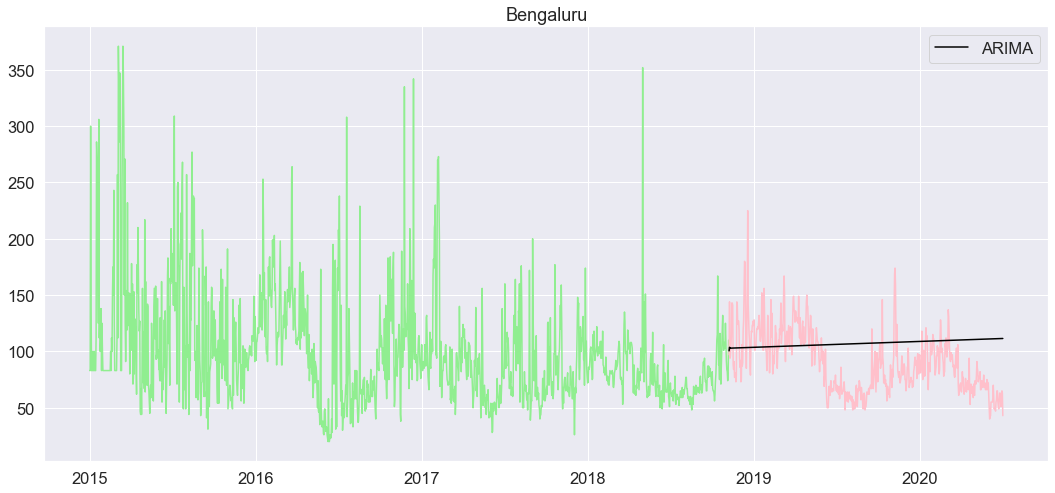

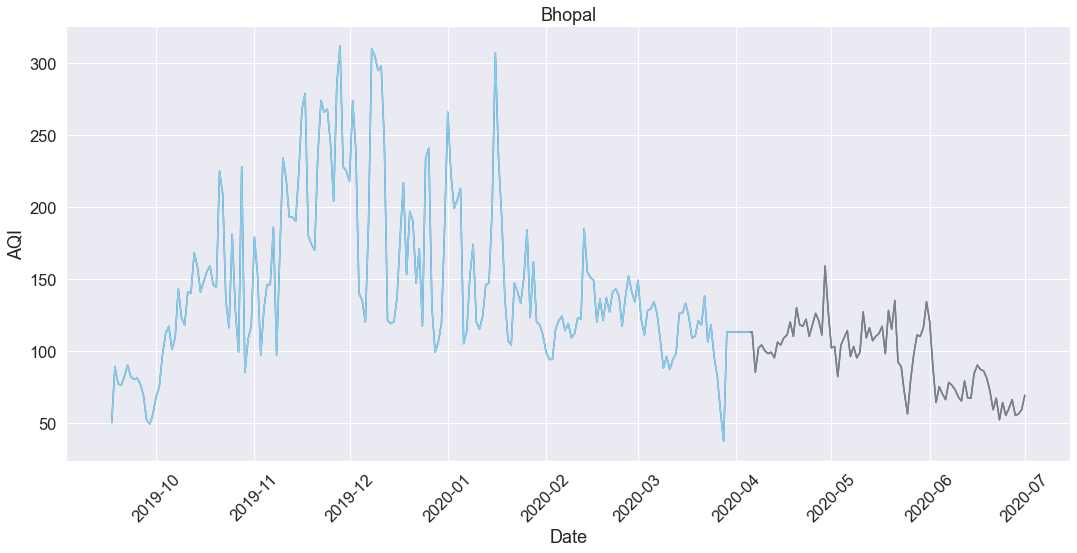

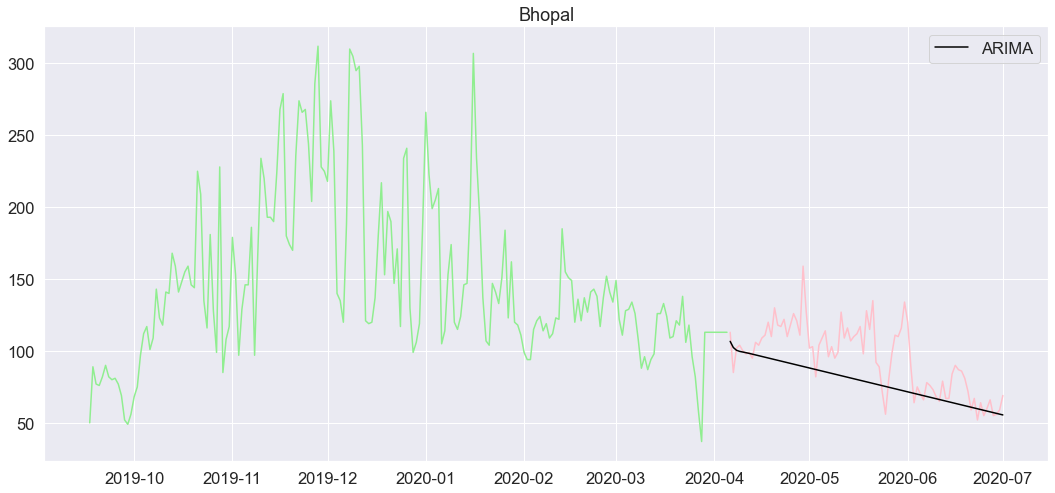

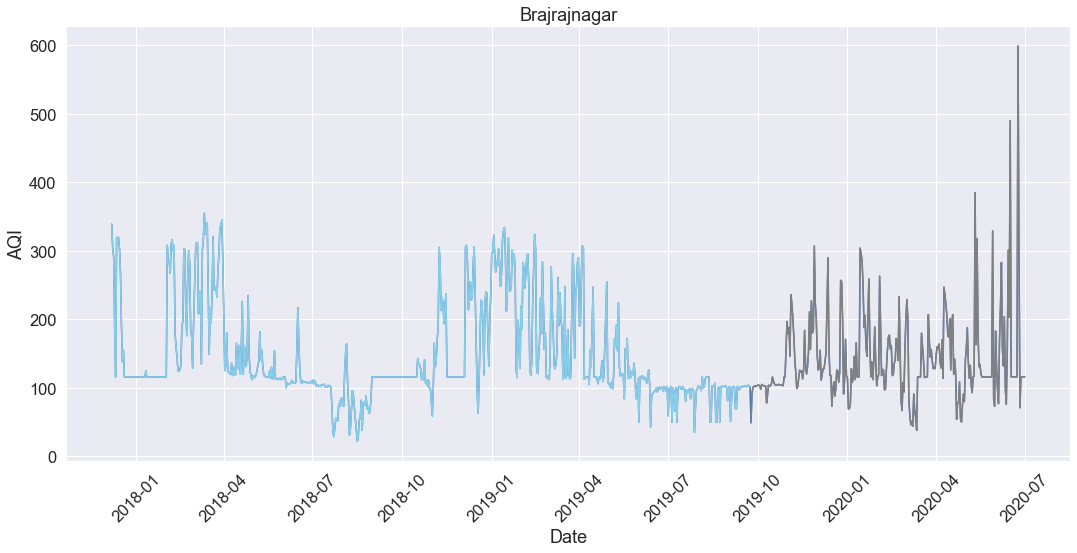

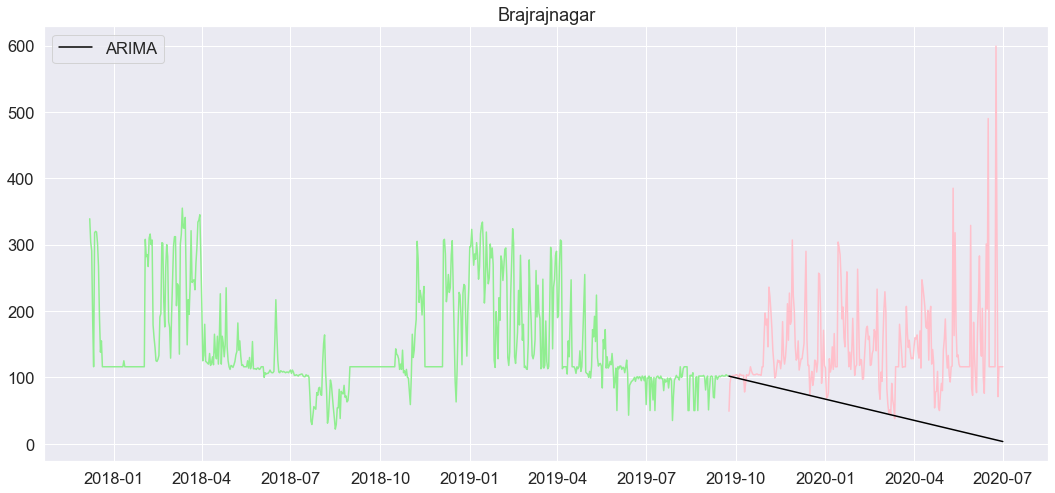

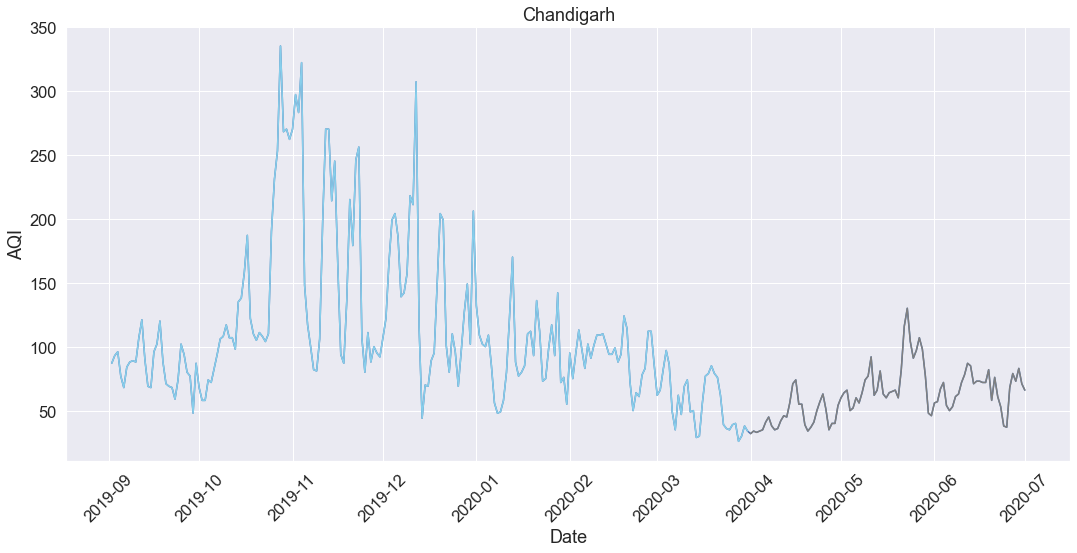

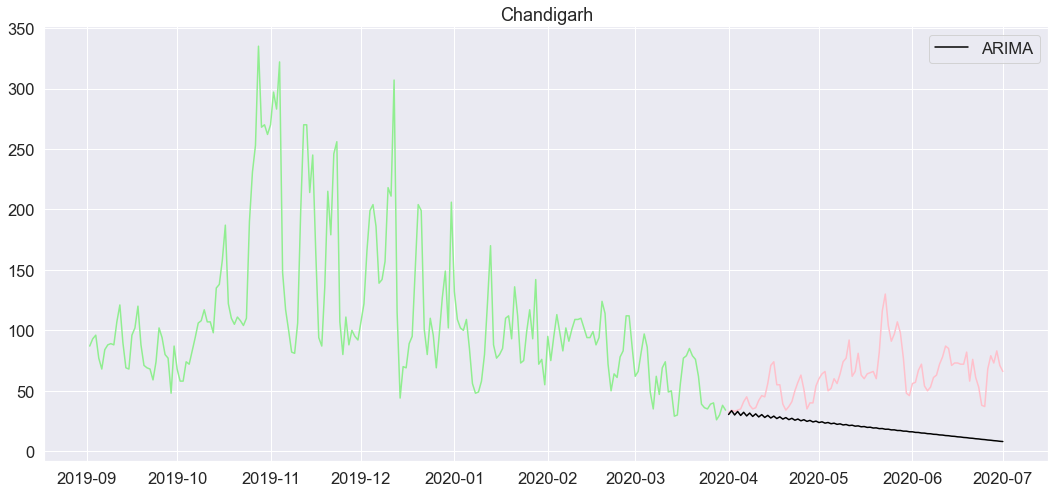

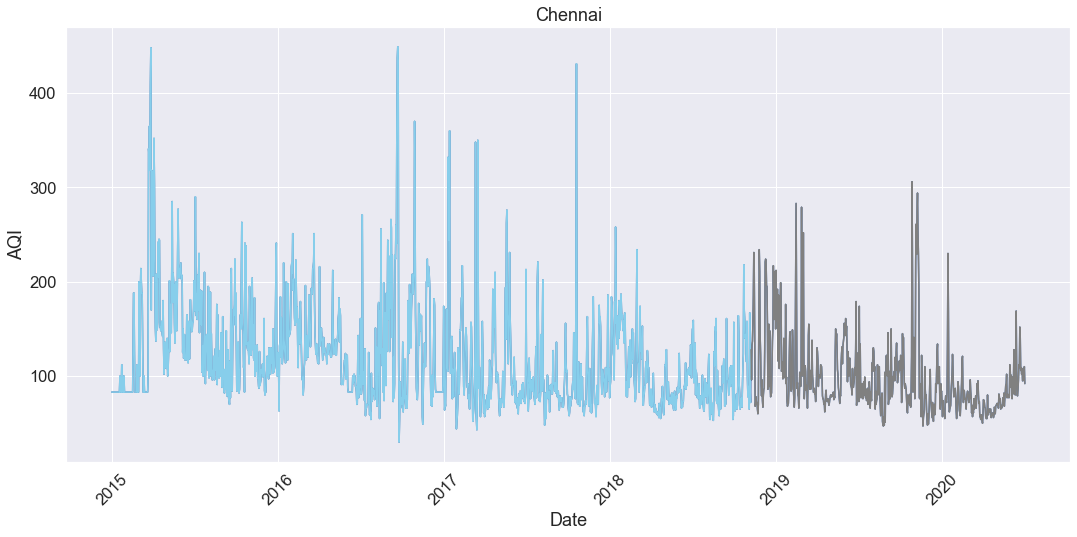

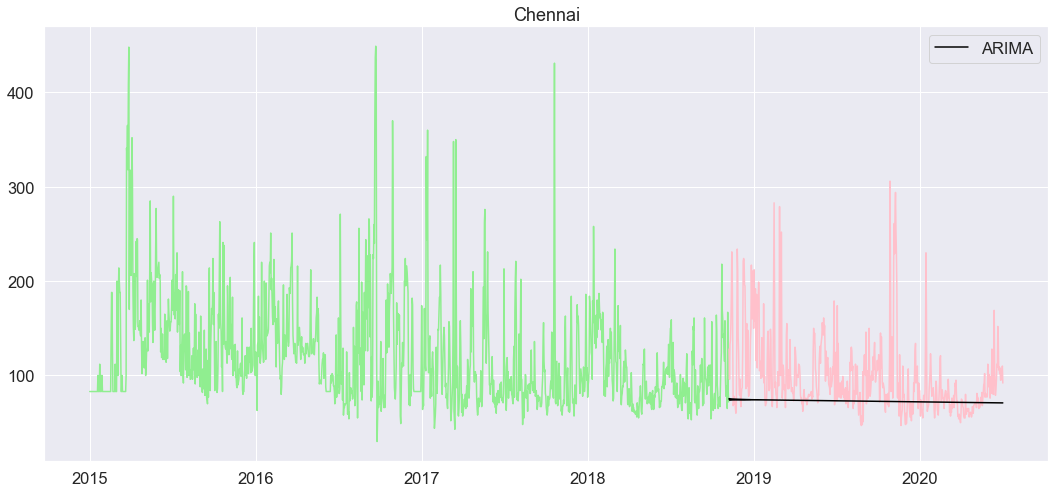

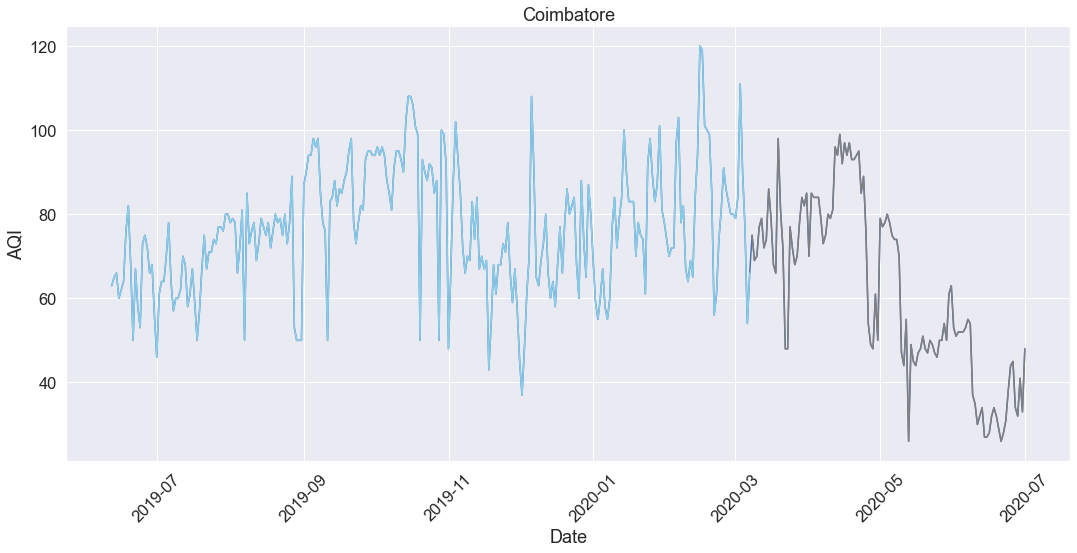

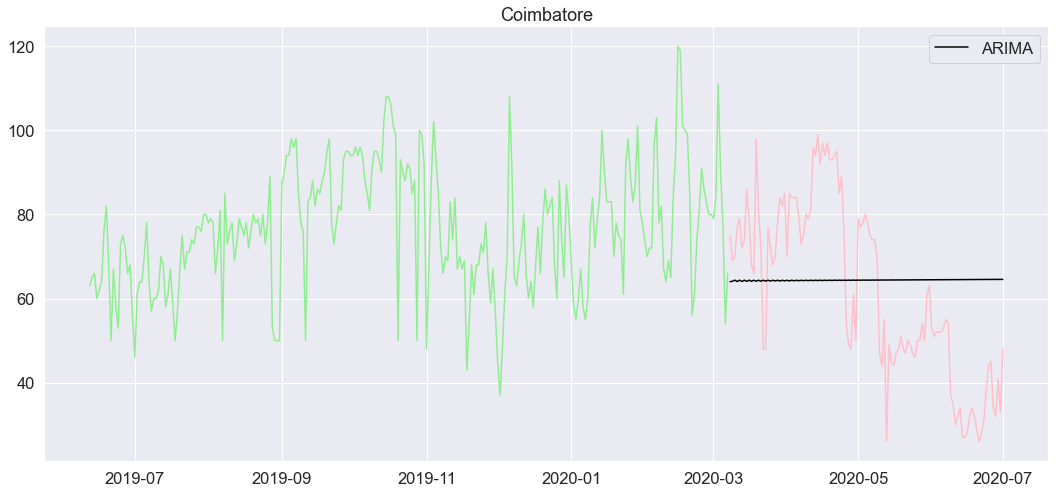

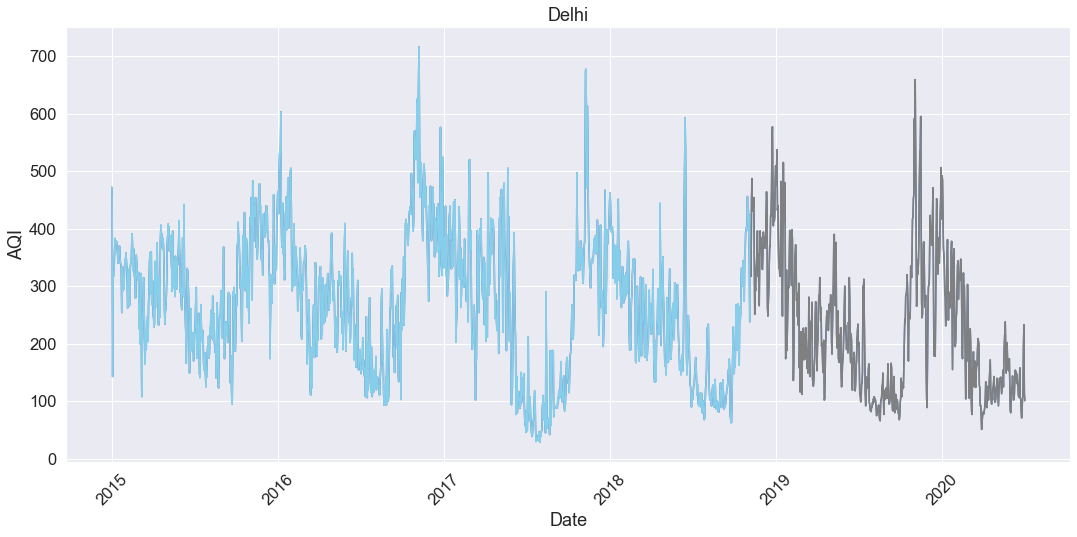

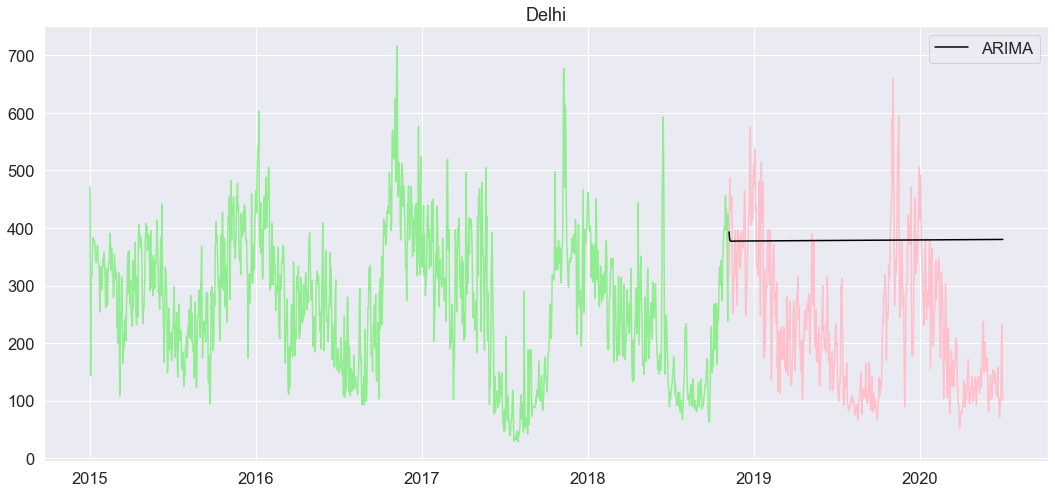

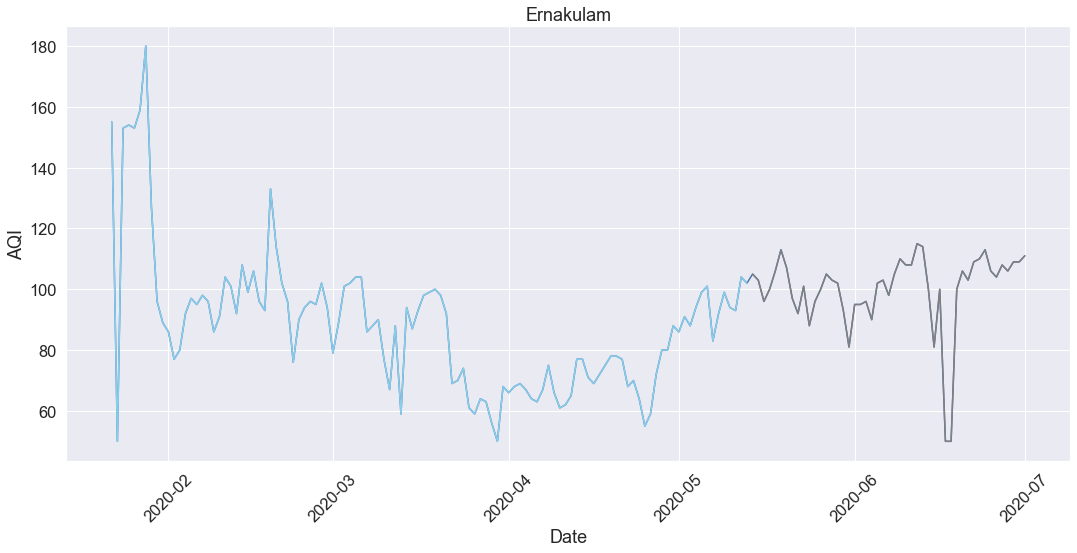

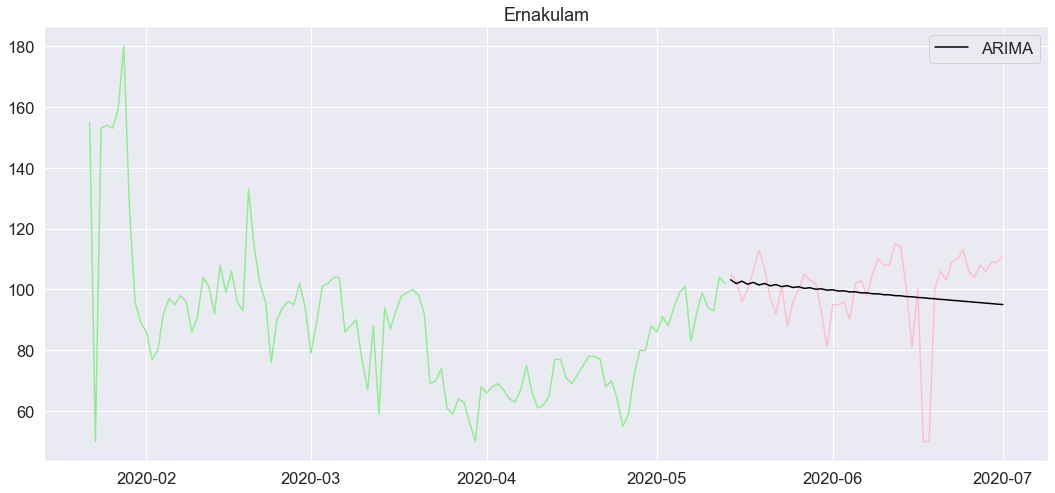

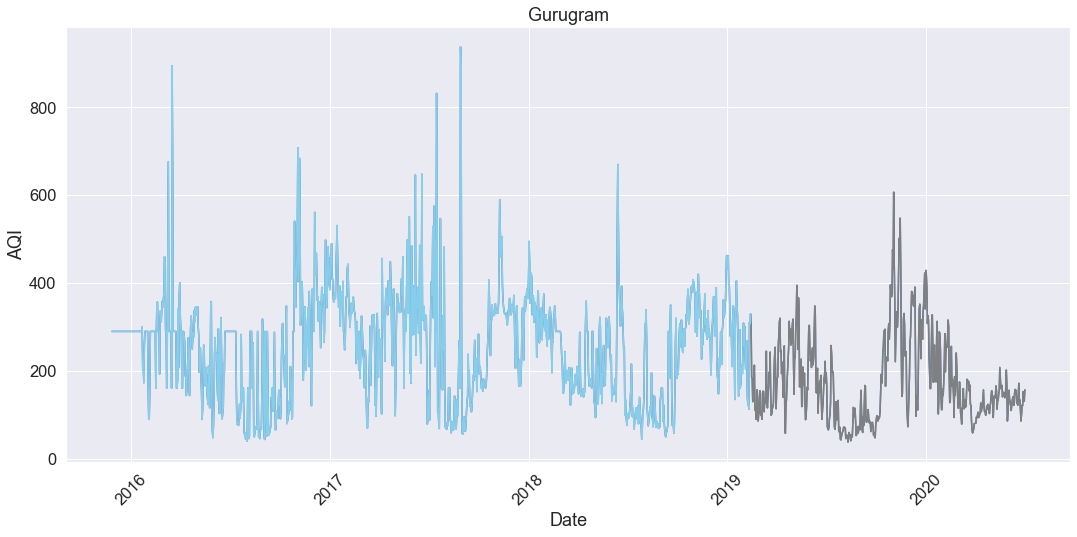

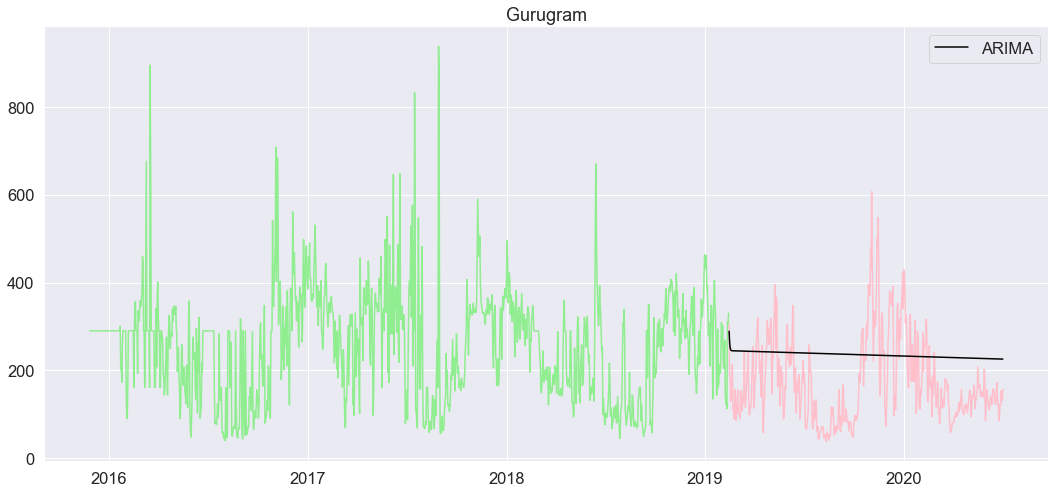

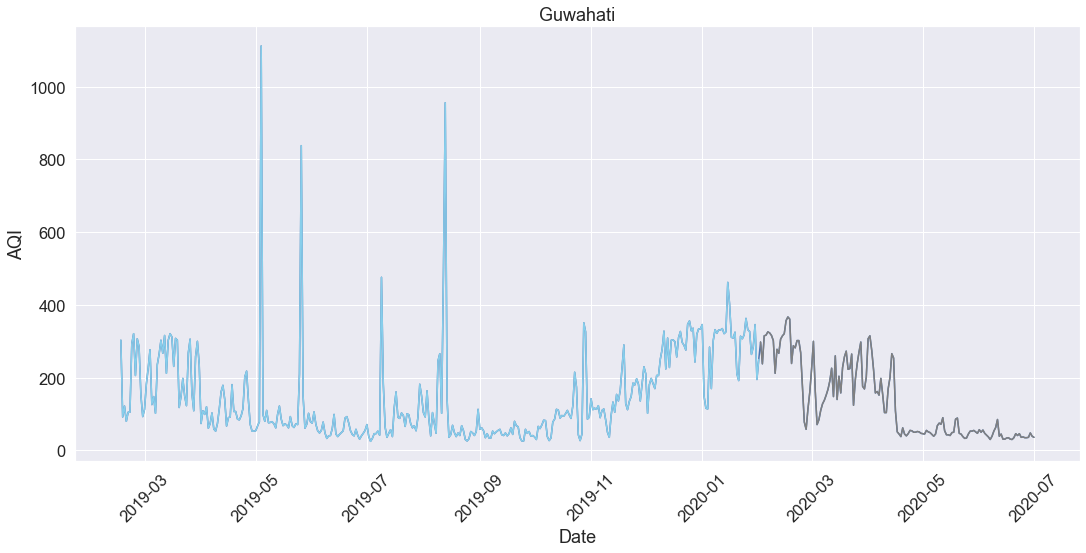

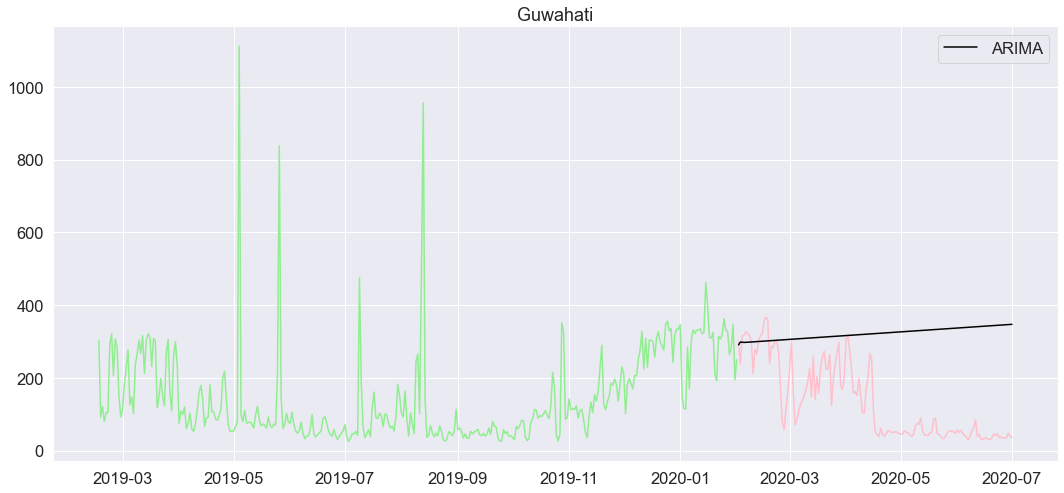

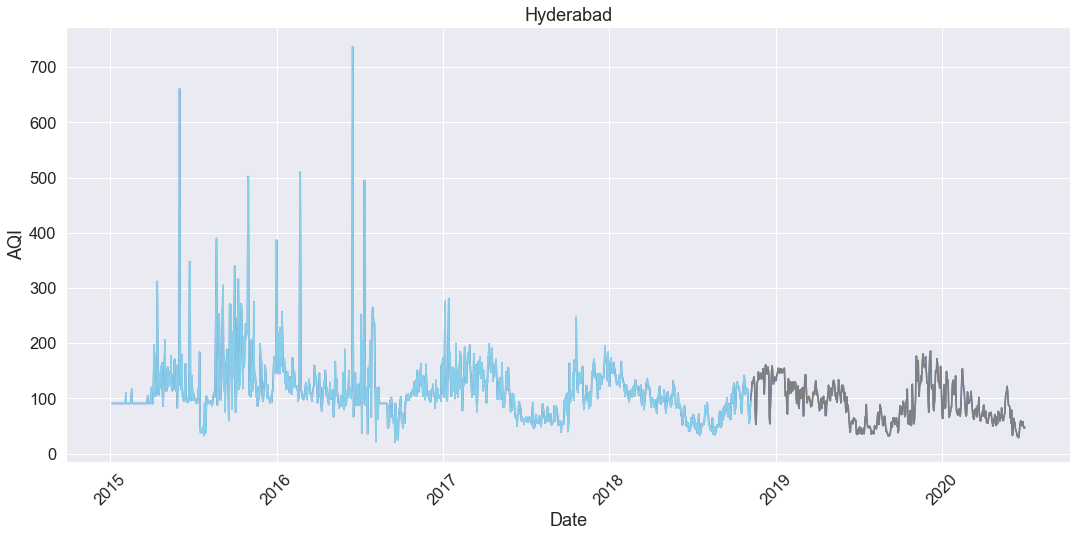

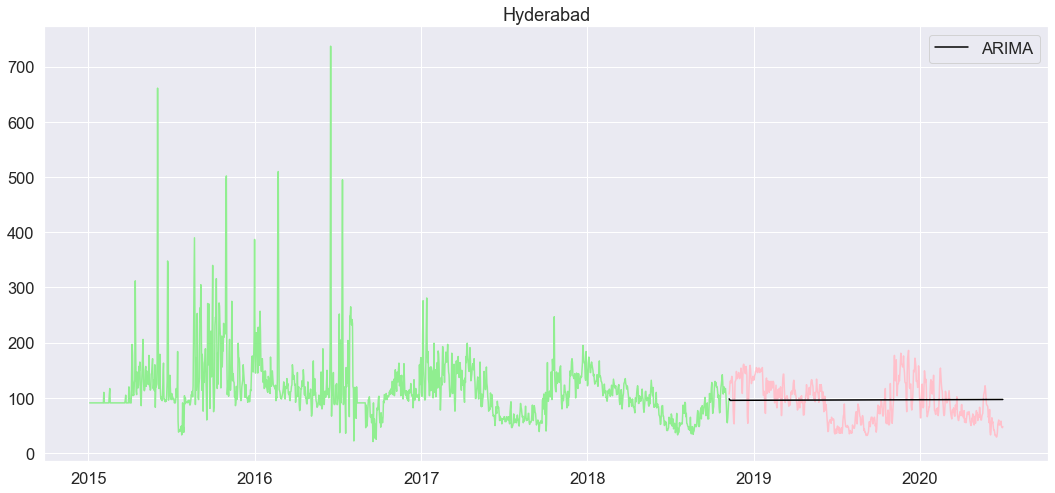

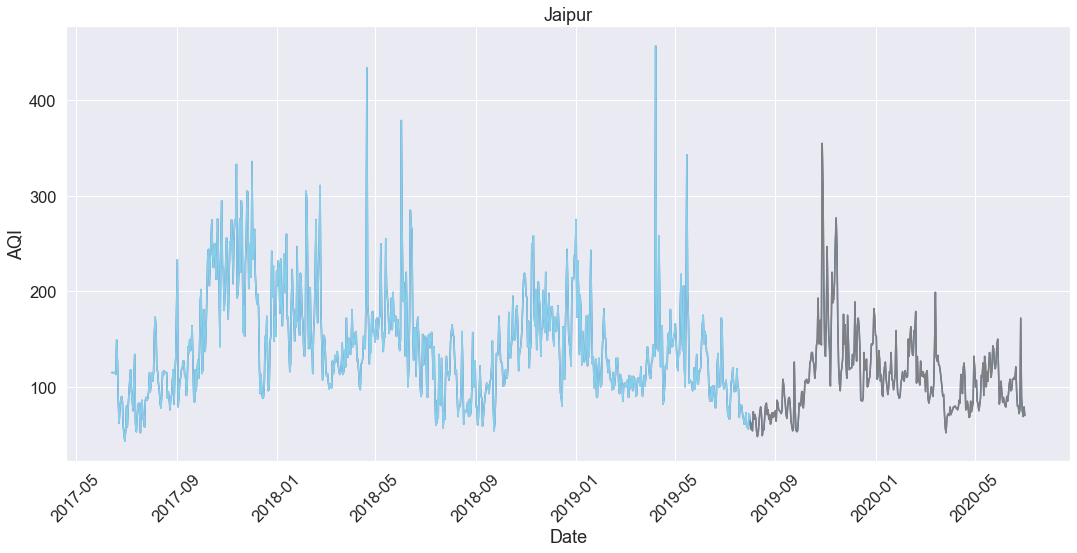

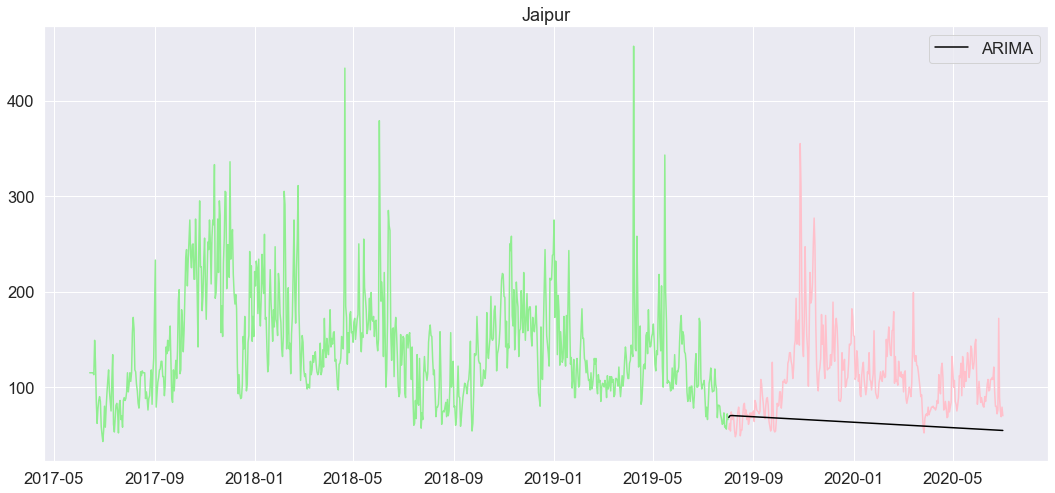

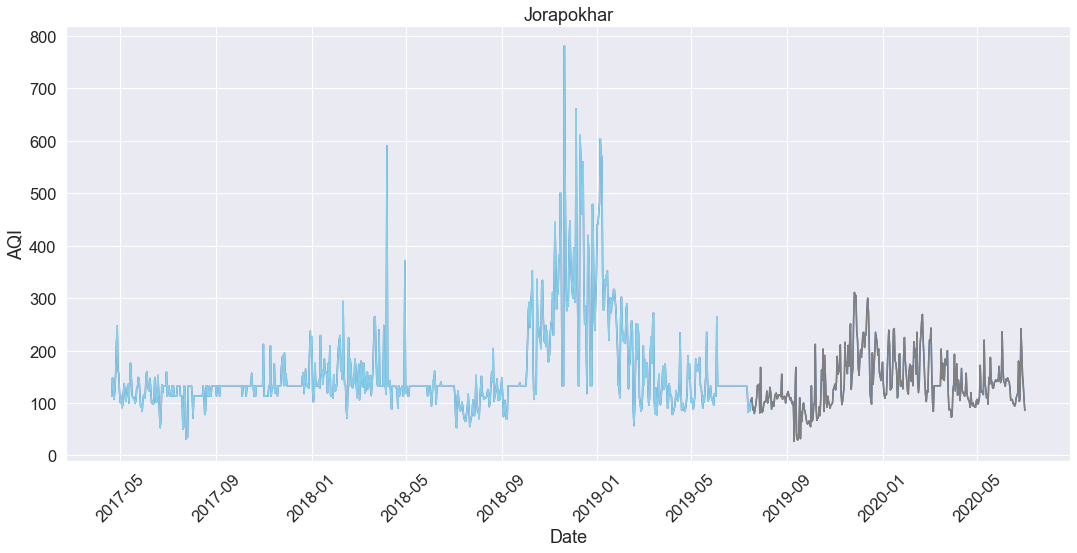

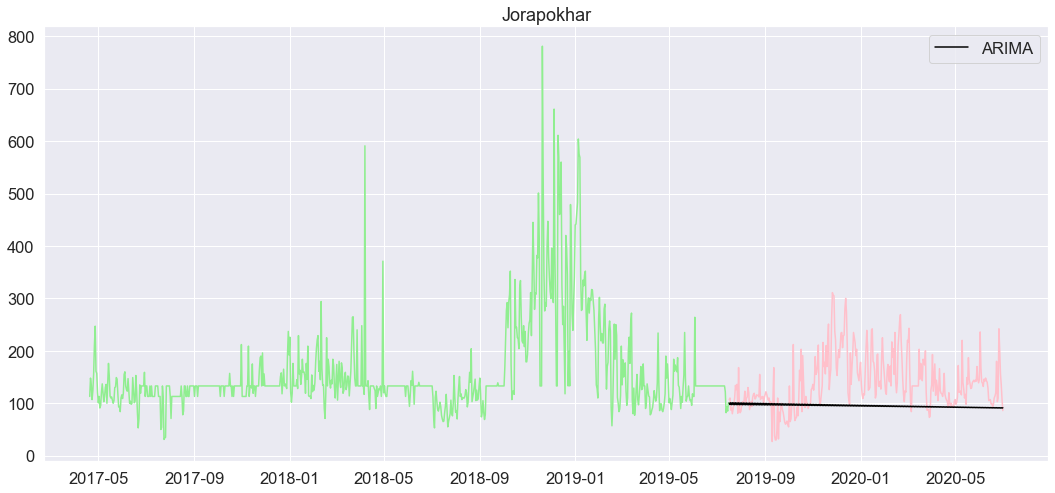

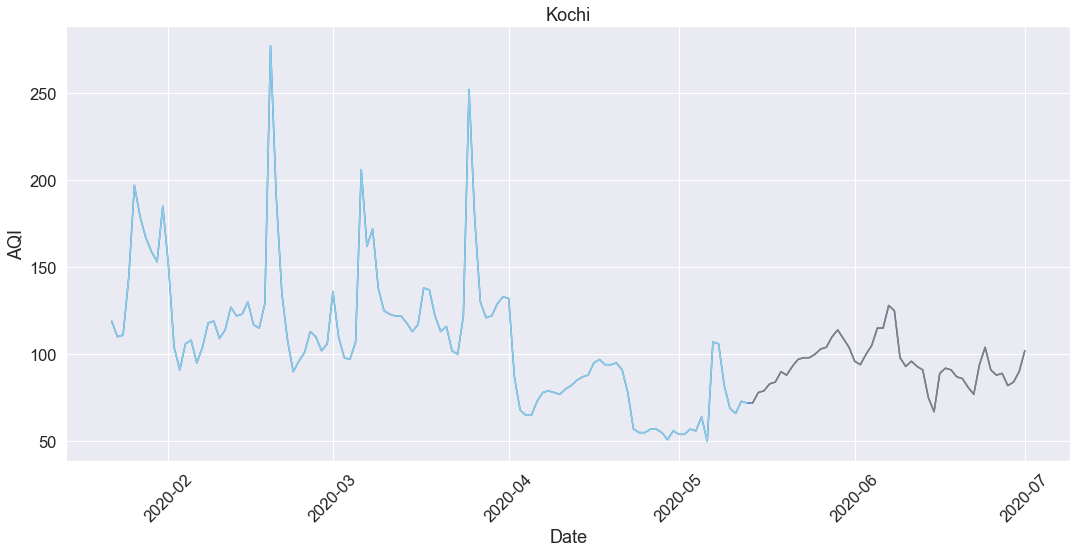

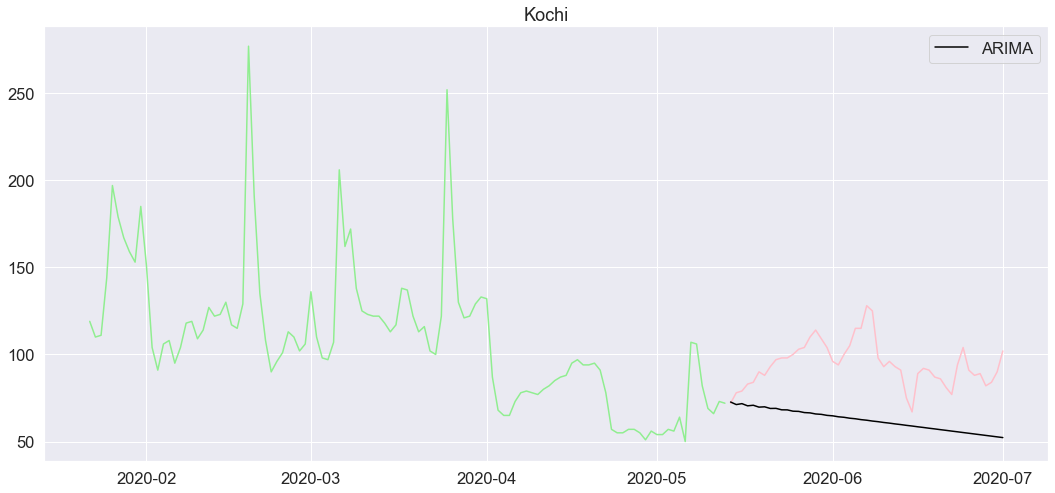

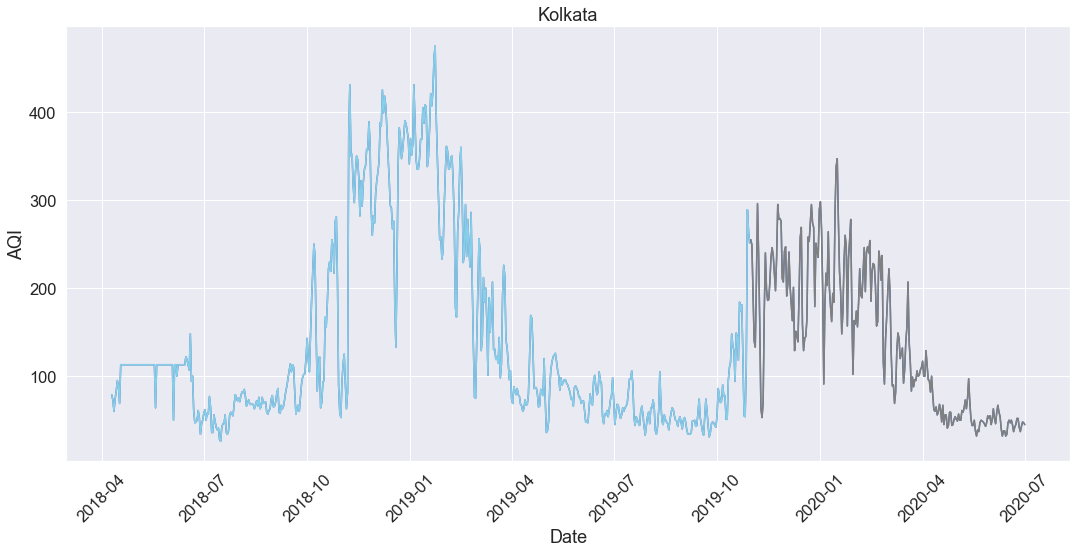

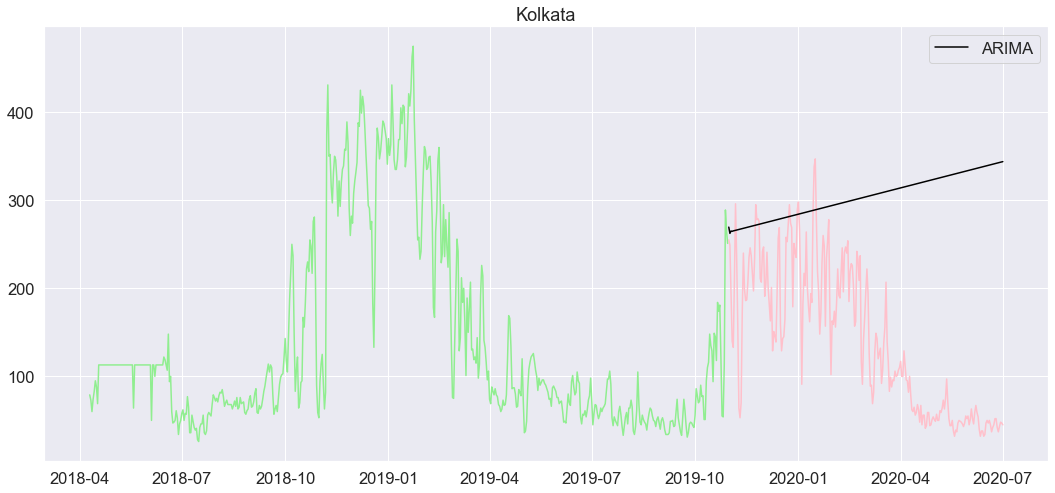

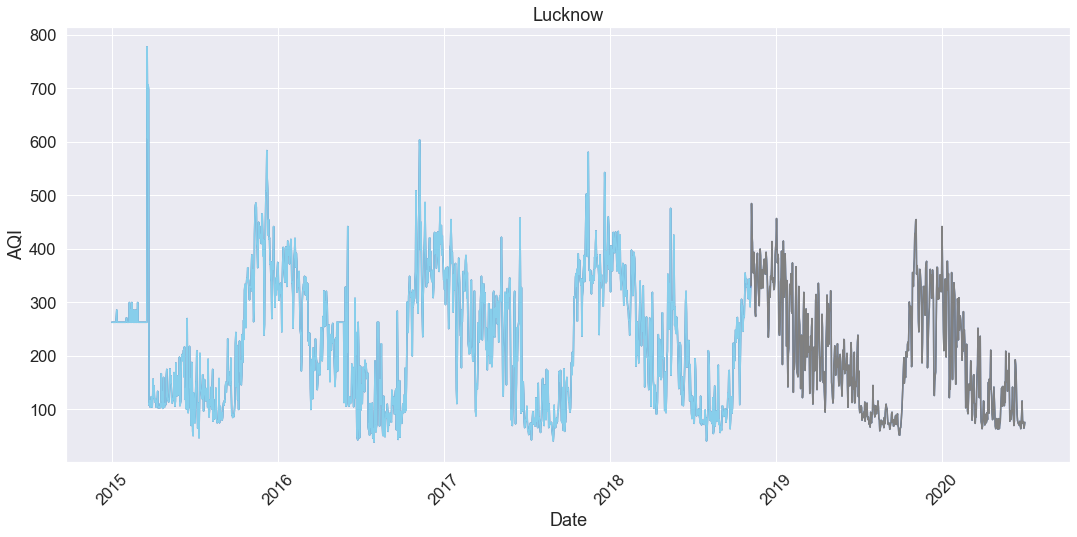

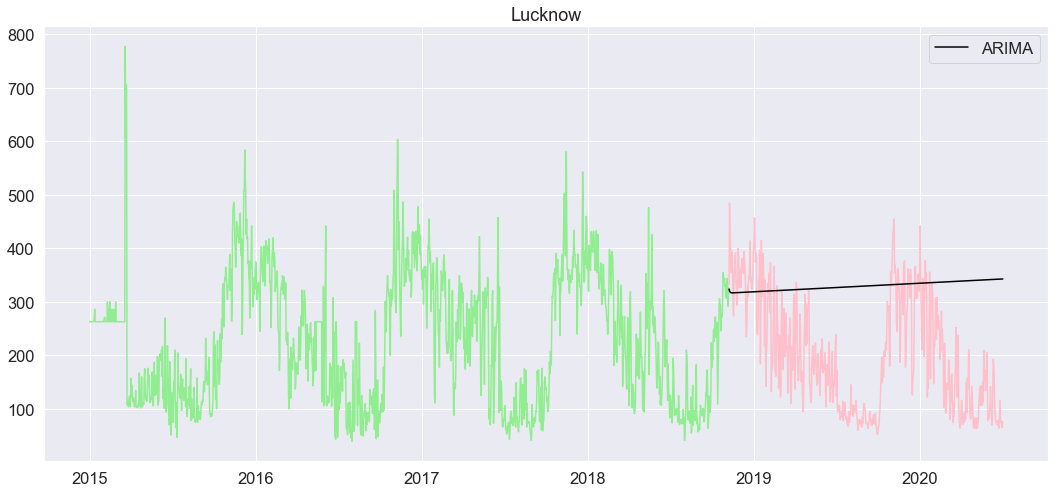

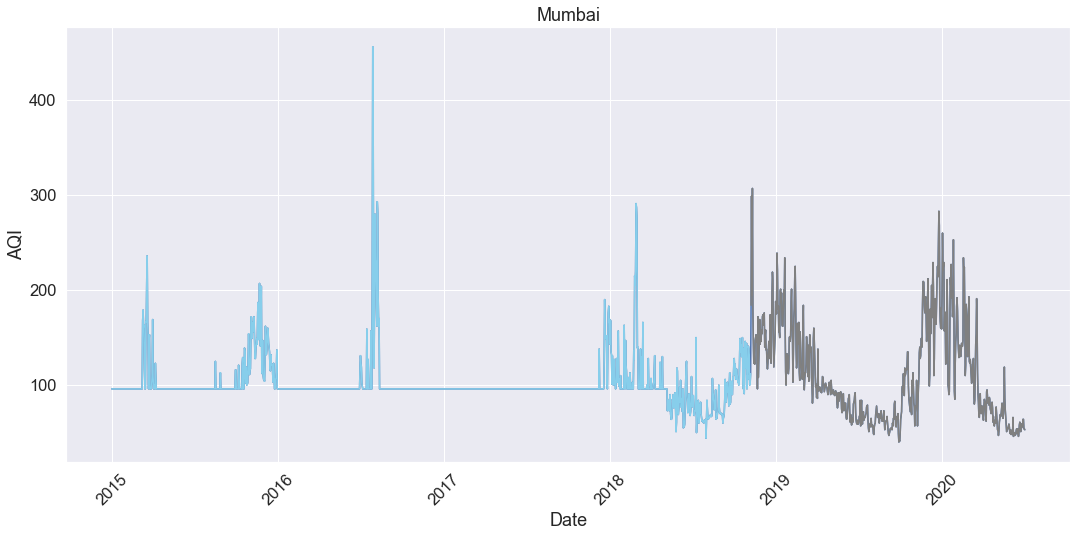

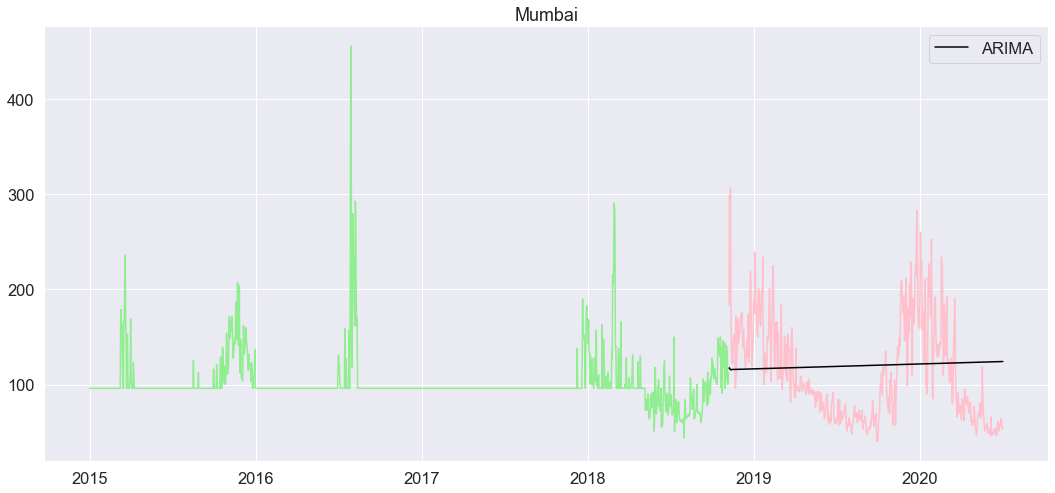

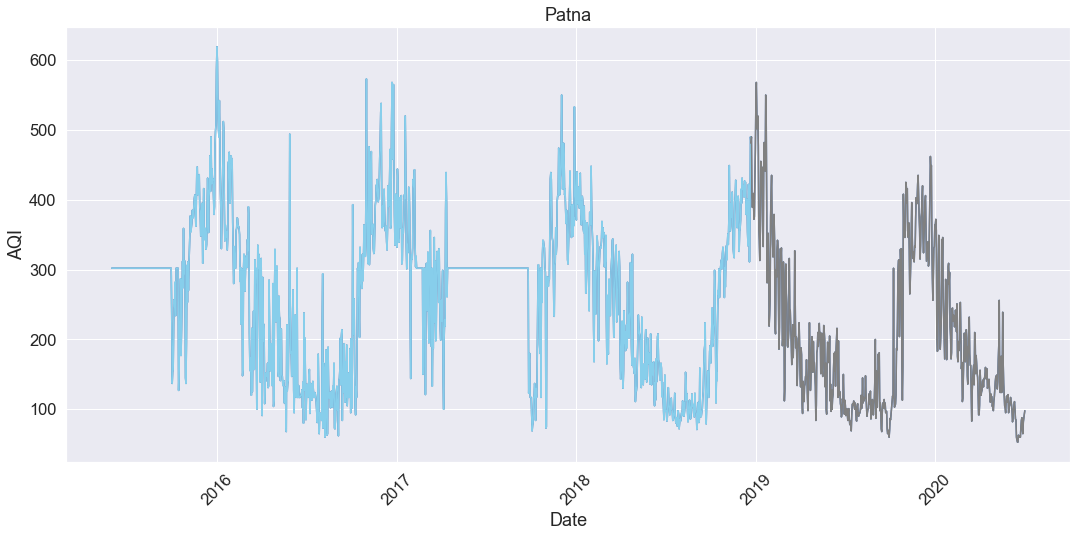

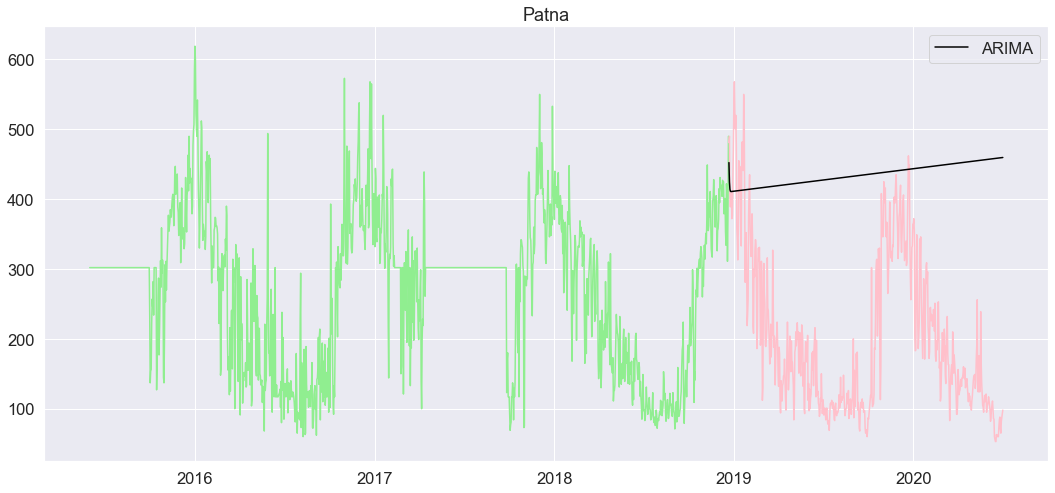

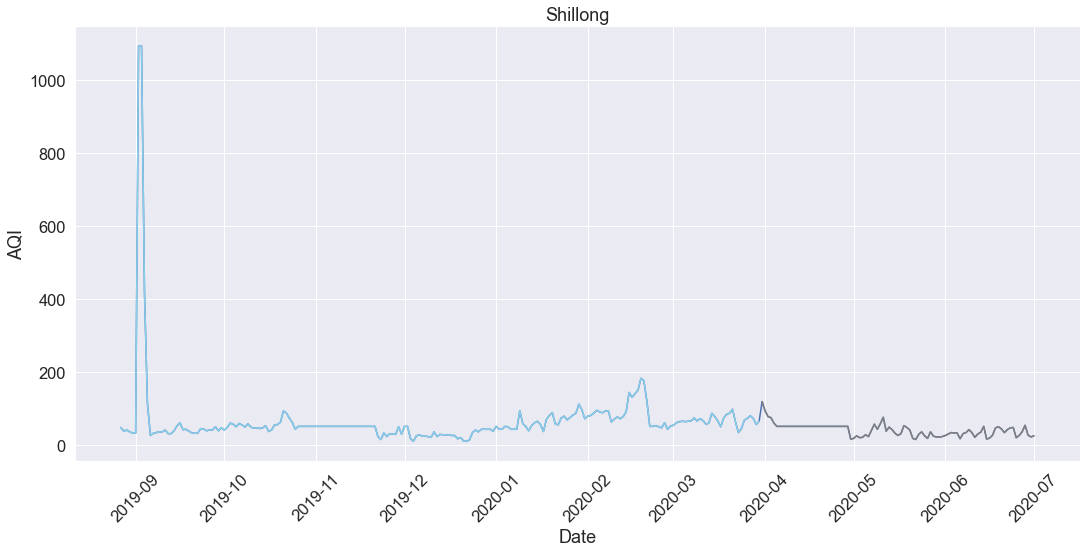

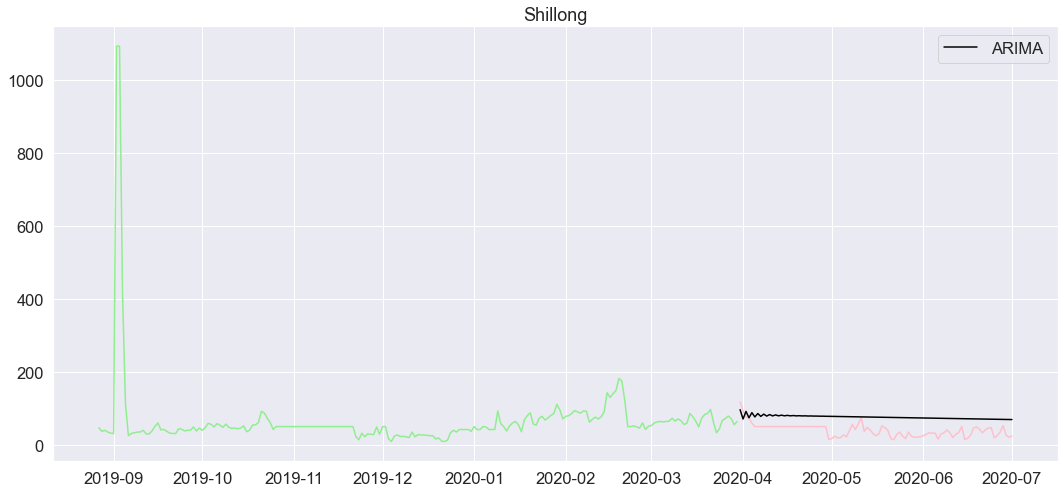

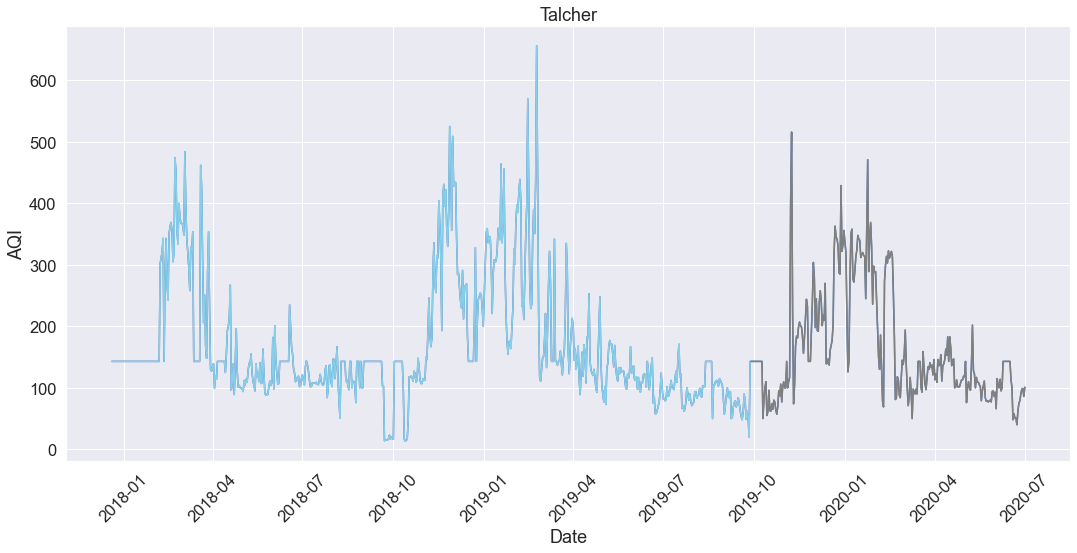

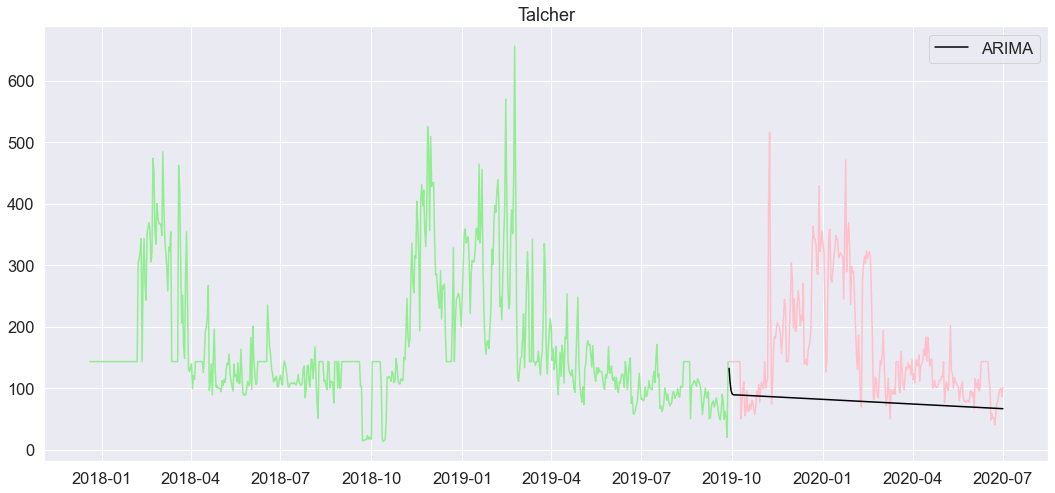

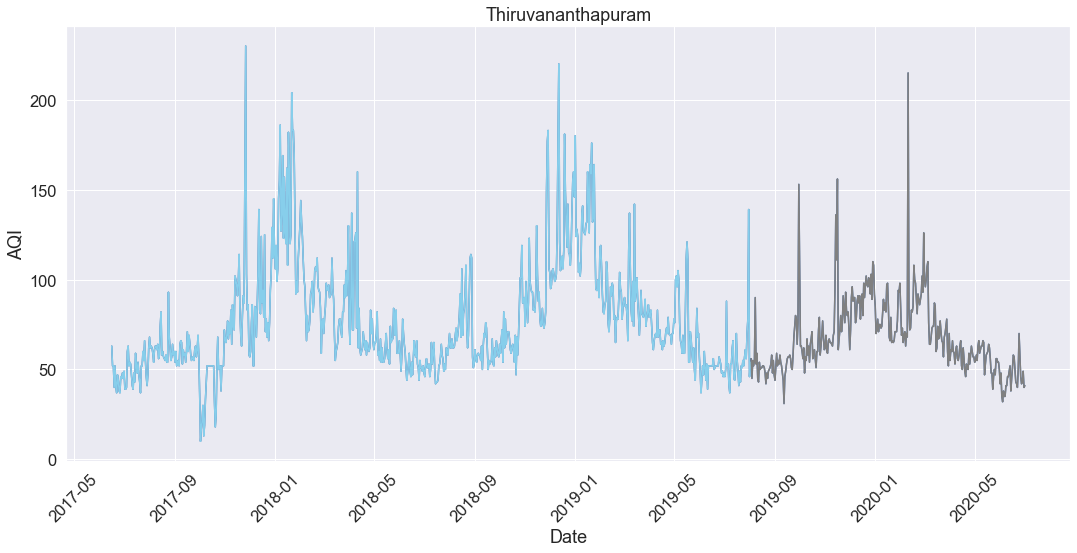

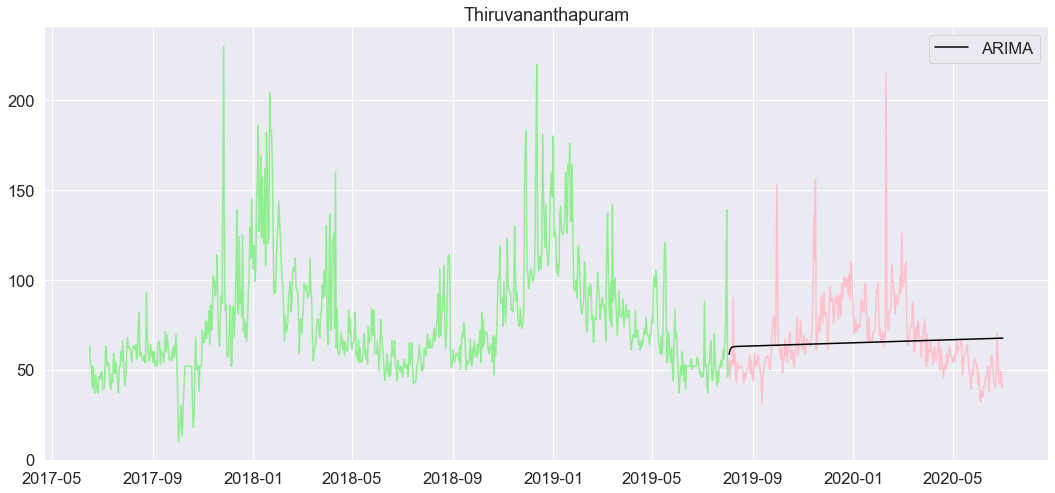

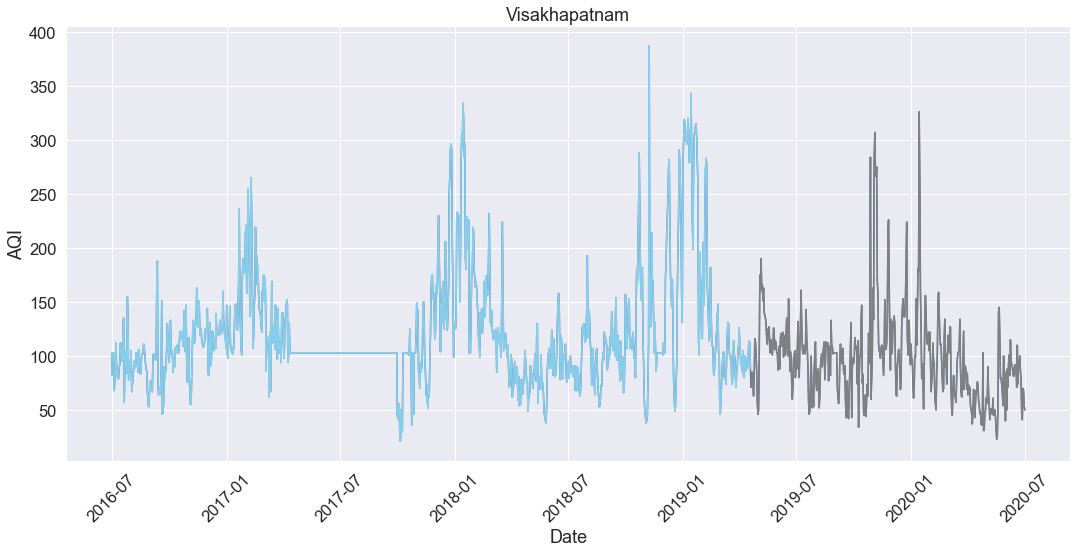

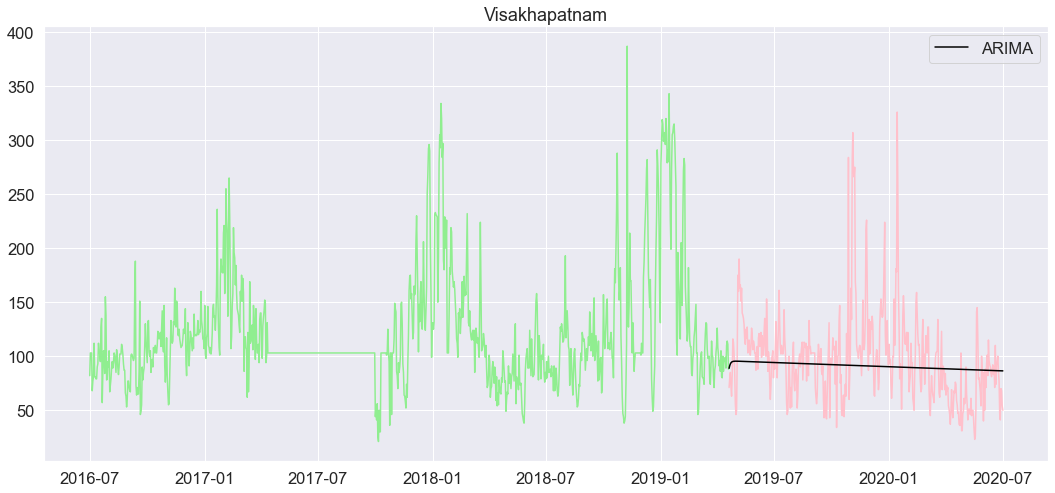

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
for City in city_day['City'].unique():
    city_day_0 = city_day[city_day['City']==City].copy()
    city_day_0 = city_day_0.reset_index(drop=True)
    plt.figure(figsize=(18,8))
    plt.ylabel('AQI')
    plt.xlabel('Date')
    plt.plot(city_day_0['Date'], city_day_0['AQI'])

# Training testing spliting of data

    percent_split = 0.70
    train = city_day_0.iloc[:int(percent_split*len(city_day_0)), :]
    train = train.reset_index(drop=True)
    test = city_day_0.iloc[int(percent_split*len(city_day_0)):, :]
    test = test.reset_index(drop=True)
    plt.title(train['City'][0])

    
    plt.plot(train['Date'], train['AQI'], color="skyblue")
    plt.plot(test['Date'], test['AQI'], color="grey")
    plt.ylabel('AQI')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
#     sns.set(font_scale=1.5)
    plt.show()
    sns.set(font_scale=1.5)

    
    
# Prediction of pollution in all cities with ARIMA

    from statsmodels.tsa.arima.model import ARIMA
    y = train['AQI']
    ARIMAmodel = ARIMA(y, order=(2, 2, 2))
    ARIMAmodel = ARIMAmodel.fit()
    y_pred = ARIMAmodel.get_forecast(len(test))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
    y_pred_df.index = test['Date']
    y_pred_out = y_pred_df["Predictions"]
    plt.figure(figsize=(18,8))

    plt.title(train['City'][0])
    plt.plot(train['Date'], train['AQI'], color="lightgreen")
    plt.plot(test['Date'], test['AQI'], color="pink")
    plt.plot(y_pred_out, color='black', label = "ARIMA")
# sns.set(font_scale=1.5)
    plt.legend()

# ML MODELING
-------------------------------------------

### *Assigning independent and dependent variables 

In [75]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in city_day.columns:
    if isinstance(city_day[i][0], str):
            city_day[i] = encoder.fit_transform(city_day[i])

In [76]:
X = city_day[['PM10_SubIndex','PM2.5_SubIndex','SO2_SubIndex','NOx_SubIndex',
              'NH3_SubIndex','CO_SubIndex','O3_SubIndex','Benzene', 'Toluene']]
y = final_df[['AQI']]
# ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']

In [77]:
X.head(3)

PM10_SubIndex  PM2.5_SubIndex  SO2_SubIndex  NOx_SubIndex  NH3_SubIndex  \
0     109.333333      123.333333         33.75         21.25          5.75   
1     109.333333      123.333333         30.00         20.00          5.75   
2     109.333333      123.333333         36.25         36.25          5.75   

   CO_SubIndex  O3_SubIndex  Benzene  Toluene  
0          0.0   148.529412     0.00     0.02  
1          0.0    34.000000     3.68     5.50  
2        300.0    30.000000     6.80    16.40

In [78]:
y.head(3)

AQI
Date             
2015-01-01  149.0
2015-01-02  123.0
2015-01-03  300.0

# **KNN REGRESSOR
--------------------------------------------------------
##### *KNN is more suitable than other models because clusters of the categories in AQI provides better understanding to the model and gives best results.  

In [79]:
from sklearn.metrics import  mean_squared_error

In [80]:
from sklearn.model_selection import train_test_split
train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=.2, random_state = 4)

In [81]:
from sklearn.neighbors import KNeighborsRegressor 
knn= KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=16, p=2,
          weights='uniform')
knn.fit(train_X ,train_y)
pred = (test_X)
# print('My predicted values',pred)
# print('My actual values', test_y)
knn.score(test_X,test_y)*100

91.88037022964848

## **Gradient Boost Regressor
-------------------------------------------

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 13)

from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(learning_rate = 0.5, n_estimators = 100)
reg.fit(X_train, y_train)

reg.fit(X,y)

pred = reg.predict(X)
pred = pd.DataFrame(pred)
pred.head()
city_day= city_day.drop([], axis =1 )
city_day = city_day.iloc[:, 3:]

reg.score(X,y)*100

94.39031836122696

####  MSE

In [83]:
mse = mean_squared_error(y,pred)
print("MSE:-", mse)

MSE:- 1039.561051534778


#### RMSE

In [84]:
import math
rms = np.sqrt(mean_squared_error(y,pred))
print("RMSE:-", rms)

RMSE:- 32.2422246678913


#### R2 SCORE 

In [85]:
from sklearn.metrics import r2_score
r2print_ = r2_score(y,pred)
print("R2 SCORE:-", r2print_*100)

R2 SCORE:- 94.39031836122696


# *CROSS VALIDATION
-----------------------------------------------------------

In [86]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [87]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.000 (12.845)


***file formatting to CSV

In [88]:
# city_day_1 = pd.DataFrame(city_day_1)
# city_day_1.index += 1
# city_day_1.to_csv(r'C:\Users\asus\.ipynb_checkpoints\city_day_predict.csv')